#Capstone Luis Alarcón de la Lastra

##Dataset - Online Retail Dataset

###¿Qué intentaremos?

- Entender la tienda mejor sacando estadísticas interesantes.
- Análisis RFM.
- Reglas A priori.
- Dashboard interactivo. (Por cliente, producto, o predicción de demanda).

In [ ]:
import csv
import pickle
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import plotly.express as px
import plotly as py
import matplotlib.pyplot as plt
import seaborn as sns
import time

import plotly.subplots as sp
import plotly.graph_objects as go

from collections import Counter
from datetime import datetime

#import spacy

import pandas as pd
#from pathlib import Path

from tqdm import tqdm

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE


In [ ]:
def drawBarChart(label1, label2, value1, value2, xlabel, ylabel, title):
  labels = [label1, label2]

  values = [value1, value2]

  fig, ax = plt.subplots(figsize=(8, 6))

  bars = ax.bar(labels, values, color='lightblue')

  ax.set_xlabel(xlabel, fontsize=14)
  ax.set_ylabel(ylabel, fontsize=14)
  ax.set_title(title, fontsize=20, pad=20)

  for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center',
                va='bottom',
                fontsize=12)

In [ ]:
def findPercentages(cancelled, Not_cancelled):
  counter = 0
  percentages = []
  for i in cancelled:
    percentage = (i / Not_cancelled[counter]) * 100
    counter = counter + 1
    percentages.append(percentage)
  return percentages



In [ ]:
def drawPieChart(label1, label2, value1, value2, title):
  labels = [label1, label2]
  values = [value1, value2]

  colors = sns.color_palette('pastel')[0:len(values)]
  fig, ax = plt.subplots(figsize=(6, 6))
  wedges, texts, autotexts = ax.pie(values, colors=colors, autopct='%1.1f%%', startangle=90)
  ax.set_title(title, fontsize=20, pad=20)

  for text in texts:
    text.set_color('grey')
    text.set_fontsize(14)

  for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)

  ax.legend(wedges, labels, loc='center', bbox_to_anchor=(0.5, -0.1), fontsize=14, title='Colors')

  plt.show()

In [ ]:
def plot_histograms(df1, df2, col, bins=130, xlabel1='', xlabel2='', ylabel=''):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
    axs[0].hist(df1[col], bins=bins, alpha=0.5)
    axs[1].hist(df2[col], bins=bins, alpha=0.5)
    axs[0].set_xlim([0, 1000])
    axs[1].set_xlim([0, 1000])
    axs[0].set_xlabel(xlabel1)
    axs[1].set_xlabel(xlabel2)
    axs[0].set_ylabel(ylabel)
    plt.show()

In [ ]:
df = pd.read_csv('/content/online_retail_II 2 2.csv', sep=',', engine='c')

In [ ]:
purgedDataframe = pd.read_pickle('/content/PurgedDataframe.pkl')

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.00,France


In [ ]:
def Df_info(df):
    print("########### Head ###########")
    print(df.head())
    print("########### Tail ###########")
    print(df.tail())
    print("########### Shape ###########")
    print("Number of rows in dataset is: ", df.shape[0])
    print("Number of columns in dataset is: ", df.shape[1])
    print("########### Info ###########")
    print(df.info())
    print("########### Columns ###########")
    print(df.columns)
    print("########### Quantiles ###########")
    print(df.describe().T)
    print("########### NULLS ###########")
    print(df.isnull().sum())

In [ ]:
Df_info(df)

########### Head ###########
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95     13085.00  United Kingdom  
1  2009-12-01 07:45:00   6.75     13085.00  United Kingdom  
2  2009-12-01 07:45:00   6.75     13085.00  United Kingdom  
3  2009-12-01 07:45:00   2.10     13085.00  United Kingdom  
4  2009-12-01 07:45:00   1.25     13085.00  United Kingdom  
########### Tail ###########
        Invoice StockCode                      Description  Quantity  \
1067366  581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
1067367  58

- ID has null values.
- Price and Quantity have negative values. Have to investigate.
- Customer ID should be object/string, not int.

In the "Quantiles" printed frame Qunatity and Price have negative values. Something we'll have to take a look at.

Before going to analyse the strangeness in pricing and quantities, lets do a couple standard cleaning procedures. First, lets treat duplicate rows.

In [ ]:
# df_filtered = df.loc[(df['Day'] == 'Sunday')]
# df_filtered

In [ ]:
#df_filtered["InvoiceDate"].unique()

In [ ]:
print('Duplicate entries: {}'.format(df.duplicated().sum()))
print('{}% rows are duplicate.'.format(round((df.duplicated().sum()/df.shape[0])*100),2))

Duplicate entries: 34335
3% rows are duplicate.


In [ ]:
df.drop_duplicates(inplace = True)

Create sales column

In [ ]:
df["Sales"] = df["Price"] * df["Quantity"]

Then lets convert ID to string

In [ ]:
df['Customer ID'] = df['Customer ID'].astype("string")
df['Description'] = df['Description'].astype("string")
df['StockCode'] = df['StockCode'].astype("string")
df['Invoice'] = df['Invoice'].astype("string")

Lets eliminate products which really are not.

In [ ]:
df = df.drop(df[df['Description'] == 'Manual'].index)
df = df.drop(df[df['Description'] == 'DOTCOM POSTAGE'].index)
df = df.drop(df[df['Description'] == 'POSTAGE'].index)
df = df.drop(df[df['Description'] == 'BANK CHARGES'].index)
df = df.drop(df[df['Description'] == 'AMAZON FEES'].index)

Datetime format

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')
df['Date'] = df['InvoiceDate'].dt.normalize()
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month_name().str[:3]
df['Day'] = df['InvoiceDate'].dt.day_name()
df['hour'] = df['InvoiceDate'].dt.hour
df['month_year'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M')

In [ ]:
print("Total number of transaction with negative quantity:", df[df['Quantity'] <= 0 ]['Quantity'].count())
print("Precentage of transactions with zero or negative quantity" ,round(len(df[df['Quantity']<=0])/len(df)*100, 2),"%")
print("Total number of transaction with a negative or 0 price:", df[df['Price'] <= 0 ]['Price'].count())
print("Precentage of transactions with zero or negative price" ,round(len(df[df['Price']<=0])/len(df)*100, 2),"%")

Total number of transaction with negative quantity: 21732
Precentage of transactions with zero or negative quantity 2.11 %
Total number of transaction with a negative or 0 price: 6007
Precentage of transactions with zero or negative price 0.58 %


###Negative Quantities which are not cancellations

Focusing now on rows with negative price values, we can see it has to do with an adjustment of bad depts that were not payed. The pre-appended A in "Invoice" could point to that.

In [ ]:
df.loc[(df['Price'] < 0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Date,Year,Month,Day,hour,month_year
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,<NA>,United Kingdom,-53594.36,2010-04-29,2010,Apr,Thursday,13,2010-04
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,<NA>,United Kingdom,-44031.79,2010-07-19,2010,Jul,Monday,11,2010-07
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,<NA>,United Kingdom,-38925.87,2010-10-20,2010,Oct,Wednesday,12,2010-10
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,<NA>,United Kingdom,-11062.06,2011-08-12,2011,Aug,Friday,14,2011-08
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,<NA>,United Kingdom,-11062.06,2011-08-12,2011,Aug,Friday,14,2011-08


In [ ]:
df.loc[(df['Price'] < 0)].sum()

Quantity                                                    5
Price                                              -158676.14
Country     United KingdomUnited KingdomUnited KingdomUnit...
Sales                                              -158676.14
Year                                                    10052
Month                                         AprJulOctAugAug
Day                       ThursdayMondayWednesdayFridayFriday
hour                                                       64
dtype: object

We can see around 150.000£ accumulated in bad debts for almost two years.

It could be useful to know for the company to account for an estimated 75.000£ in bad debts for the year 2012.

In [ ]:
equalPrices = df[ df['Price'] == 0 ].index

We'll delete them of the Dataset so to not confuse future analysis

In [ ]:
negative_prices = df[ df['Price'] < 0 ].index
df = df.drop(negative_prices)
df = df.drop(equalPrices)

Next we go on to analyse quantity negative values.

In [ ]:
df.loc[(df["Quantity"] < 0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Date,Year,Month,Day,hour,month_year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40,2009-12-01,2009,Dec,Tuesday,10,2009-12
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.90,2009-12-01,2009,Dec,Tuesday,10,2009-12
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.00,2009-12-01,2009,Dec,Tuesday,10,2009-12
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.60,2009-12-01,2009,Dec,Tuesday,10,2009-12
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40,2009-12-01,2009,Dec,Tuesday,10,2009-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065909,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom,-23.40,2011-12-09,2011,Dec,Friday,9,2011-12
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,2011-12-09,2011,Dec,Friday,9,2011-12
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,2011-12-09,2011,Dec,Friday,11,2011-12
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,2011-12-09,2011,Dec,Friday,11,2011-12


We see that all Invoices have a pre-appended C which probably stands for cancellations. Before going on to investigate them lets see if there is other causes for negative quantities apart from cancellations.

In [ ]:
negative_quant_notC = df[(df['Quantity'] < 0) & (~df['Invoice'].astype(str).str.contains('C'))]
negative_quant_notC

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Date,Year,Month,Day,hour,month_year
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,<NA>,United Kingdom,-0.00,2009-12-01,2009,Dec,Tuesday,10,2009-12
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,<NA>,United Kingdom,-0.00,2009-12-01,2009,Dec,Tuesday,10,2009-12
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,<NA>,United Kingdom,-0.00,2009-12-01,2009,Dec,Tuesday,10,2009-12
470,489521,21646,<NA>,-50,2009-12-01 11:44:00,0.00,<NA>,United Kingdom,-0.00,2009-12-01,2009,Dec,Tuesday,11,2009-12
3114,489655,20683,<NA>,-44,2009-12-01 17:26:00,0.00,<NA>,United Kingdom,-0.00,2009-12-01,2009,Dec,Tuesday,17,2009-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060794,581210,23395,check,-26,2011-12-07 18:36:00,0.00,<NA>,United Kingdom,-0.00,2011-12-07,2011,Dec,Wednesday,18,2011-12
1060796,581212,22578,lost,-1050,2011-12-07 18:38:00,0.00,<NA>,United Kingdom,-0.00,2011-12-07,2011,Dec,Wednesday,18,2011-12
1060797,581213,22576,check,-30,2011-12-07 18:38:00,0.00,<NA>,United Kingdom,-0.00,2011-12-07,2011,Dec,Wednesday,18,2011-12
1062371,581226,23090,missing,-338,2011-12-08 09:56:00,0.00,<NA>,United Kingdom,-0.00,2011-12-08,2011,Dec,Thursday,9,2011-12


We can see how despite not having a C for cancelled, there are still negative quantities. Customer ID and Price this time equal 0 and null which is interesting.

If you focus you'll see most rows are caused by human error, with stock breaking before reaching destination, wrong addresses being typed before sending, packages not arriving in time or getting mixed with others etc... Lets undertand the impact of human error.

We'll compare and visualize how many of total invoices are cancellations.

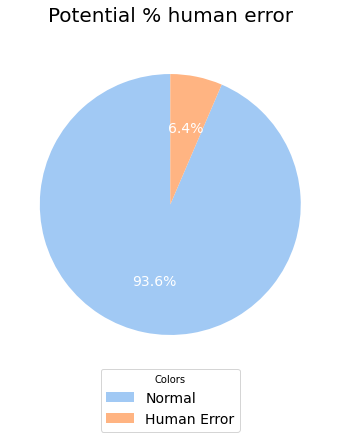

In [ ]:
human_error = pd.DataFrame(negative_quant_notC.groupby(['Invoice']).agg({'Quantity':'sum'}))
non_human_error = pd.DataFrame(df.groupby(['Invoice']).agg({'Quantity':'sum'}))
percent_human_error = human_error.shape[0] / non_human_error.shape[0] * 100
non_human_error = 100 - percent_human_error

labels = ['Normal', 'Human Error']

values = [non_human_error, percent_human_error]

colors = sns.color_palette('pastel')[0:len(values)]

fig, ax = plt.subplots(figsize=(6, 6))

wedges, texts, autotexts = ax.pie(values, colors=colors, autopct='%1.1f%%', startangle=90)


ax.set_title('Potential % human error', fontsize=20, pad=20)


for text in texts:
    text.set_color('grey')
    text.set_fontsize(14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)


ax.legend(wedges, labels, loc='center', bbox_to_anchor=(0.5, -0.1), fontsize=14, title='Colors')


plt.show()

In [ ]:
human_error["Quantity"].sum()

-569314

We compute and see that 569.314 products where not delivered potentially due to human error. That is something that the shop should certainly look at.
A possibility is that the workforce doesn't adapt to the seasonality and high demands and workers are collapsed unable to perform properly. Maybe there is too much rotation and workers are not learning the job properly, or they are not trained properly. The possibilities and their combinations are endless.

In fact lets take a look and see when most of this is happening.


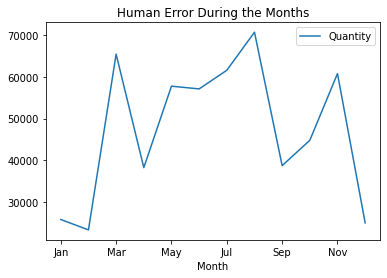

In [ ]:
dfForTimeseriesHE['Month'] = pd.Categorical(dfForTimeseriesHE['Month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)


dfForTimeseriesHE["Quantity"] = dfForTimeseriesHE["Quantity"].abs()
dfForTimeseriesHE = dfForTimeseriesHE.sort_values('Month')

ax = dfForTimeseriesHE.plot(x='Month')

plt.title("Human Error During the Months - Number of products")

plt.show()

We can see big ups and ups in lost products, lets compare them with actual sales to see if we see anything interesting.

Text(0.5, 1.0, 'Number of products shipped')

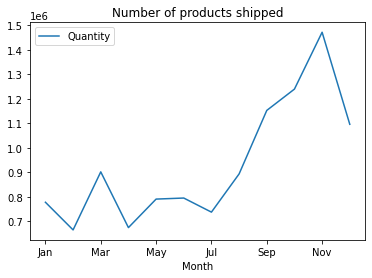

In [ ]:
SeasonsDF['Month'] = pd.Categorical(SeasonsDF['Month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)


SeasonsDF = pd.DataFrame( SeasonsDF.groupby(['Month']).agg({'Quantity':'sum'})).reset_index()

SeasonsDF = SeasonsDF.sort_values("Month")

SeasonsDF.plot(x='Month')
plt.title("Number of products shipped")

We see something interesting. Despite much less demand, the month of march has as many if not more lost products as the hot end of year months. There is something happening there which needs to be investigated as the start of spring surge in sales peak does not justify it.

Also, we see how in the stocking months prior to the big christmas sale errors seem to mount up and reach their year peack. Maybe reconsidering the stocking strategy could be a good idea. Finally of course later comes christmans with its incoming errors due to such surge in activity. To be fair though it seems to be reasonably well organised as despite soaring activity christmas sale months have a lower lost products than the other two months.

Lets finally quickly check that these transactions don't have a positive invoice match which was not deleted from the dataset.

In [ ]:
print(negative_quant_notC.sort_values("Quantity", ascending=True).head(4))
print(df[df["Quantity"] == 9600 ])
print(df[df["Quantity"] == 9200 ])

       Invoice StockCode                   Description  Quantity  \
750991  556691     23005  printing smudges/thrown away     -9600   
750990  556690     23005  printing smudges/thrown away     -9600   
303996  519017     22759                          <NA>     -9600   
156488  504311     22197                          <NA>     -9200   

               InvoiceDate  Price Customer ID         Country  Sales  \
750991 2011-06-14 10:37:00   0.00        <NA>  United Kingdom  -0.00   
750990 2011-06-14 10:37:00   0.00        <NA>  United Kingdom  -0.00   
303996 2010-08-13 09:14:00   0.00        <NA>  United Kingdom  -0.00   
156488 2010-04-12 14:39:00   0.00        <NA>  United Kingdom  -0.00   

             Date  Year Month      Day  hour month_year  
750991 2011-06-14  2011   Jun  Tuesday    10    2011-06  
750990 2011-06-14  2011   Jun  Tuesday    10    2011-06  
303996 2010-08-13  2010   Aug   Friday     9    2010-08  
156488 2010-04-12  2010   Apr   Monday    14    2010-04  
       I


Good. Ok, so being aware of the impact of lost products, lets eliminate these negative quantities and move on to investigate cancellations.

In [ ]:
human_errorDFIndex = df[(df['Quantity'] < 0) & (~df['Invoice'].astype(str).str.contains('C'))].index
df = df.drop(human_errorDFIndex)

Also fill NaNs for facilitating future analysis and go on to analyse cancellations.

In [ ]:
df['Description'] = df['Description'].fillna('missing')

#Cancellations

###Understanding importance of cancellations

Lets see and understand the importance of cancellations. From what we've seen with human error we might find vital insights for the shop.

In [ ]:
cancelled_stock = df.loc[df['Invoice'].astype(str).str.contains('C')]
cancelled_stock

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Date,Year,Month,Day,hour,month_year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40,2009-12-01,2009,Dec,Tuesday,10,2009-12
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.90,2009-12-01,2009,Dec,Tuesday,10,2009-12
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.00,2009-12-01,2009,Dec,Tuesday,10,2009-12
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.60,2009-12-01,2009,Dec,Tuesday,10,2009-12
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40,2009-12-01,2009,Dec,Tuesday,10,2009-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065909,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom,-23.40,2011-12-09,2011,Dec,Friday,9,2011-12
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,2011-12-09,2011,Dec,Friday,9,2011-12
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,2011-12-09,2011,Dec,Friday,11,2011-12
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,2011-12-09,2011,Dec,Friday,11,2011-12


We see 18339 different individual products cancelled.

Lets create a Dataframe grouped by Invoice so we can compare cancellations dataframe with normal dataframe

In [ ]:
cancellations = cancelled_stock.groupby(['Invoice']).agg({'Price':'sum', 'Quantity':'sum', "Customer ID":"first"})
cancellations = cancellations.reset_index()
cancellations = cancellations.groupby(['Customer ID']).agg({'Price':'sum', 'Quantity':'sum', "Invoice":"count"})

normal_df = df[ df['Quantity'] > 0 ]
normal_df = normal_df.groupby(['Invoice']).agg({'Price':'sum', 'Quantity':'sum', "Customer ID":"first"})
normal_df = normal_df.reset_index()
normal_df = normal_df.groupby(['Customer ID']).agg({'Price':'sum', 'Quantity':'sum', "Invoice":"count"})
cancelled_invoices = cancellations["Invoice"].sum()
normal_invoices = normal_df["Invoice"].sum()


Visualizing differences between dataframes

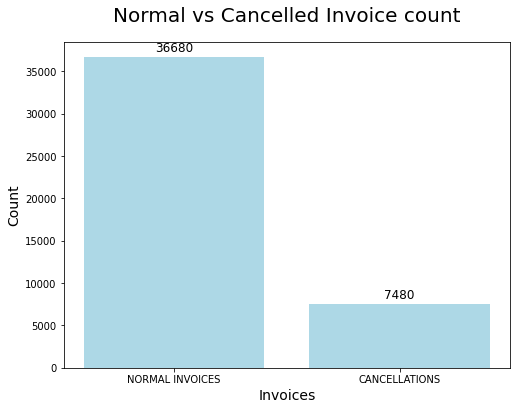

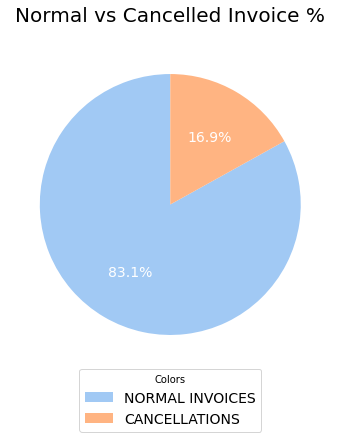

In [ ]:
drawBarChart("NORMAL INVOICES", "CANCELLATIONS", normal_invoices, cancelled_invoices,"Invoices", "Count","Normal vs Cancelled Invoice count" )
drawPieChart("NORMAL INVOICES", "CANCELLATIONS", normal_invoices, cancelled_invoices, "Normal vs Cancelled Invoice %")


We see that the cancelled invoices account for 16.5% of total invoices. A very very high percentage that should be looked at.

Since in the cancelled_stock df we created did not find any clear clues as to why this coul be, we'll investigate and see if we find anything that could help the shop understand this issue better.

###Seeing difference between ID's and no-IDs in cancellations

Lets see the difference in cancellations between ID's and no ID's

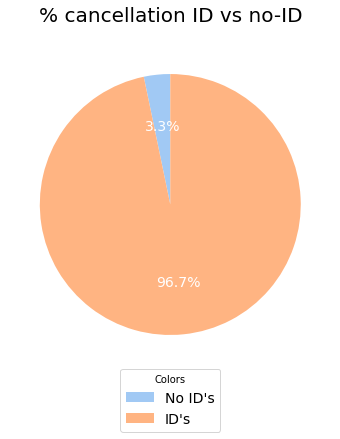

In [ ]:
groupedInvoice = cancelled_stock.groupby("Invoice").agg({"Sales": "sum",
                                                         "Customer ID": "first",
                                                         "Description": "count",
                                                         "Quantity":"sum",
                                                         "Country": "first"}).reset_index()


noIDS = groupedInvoice.loc[(groupedInvoice['Customer ID'].isnull())]
IDs = groupedInvoice.loc[(~groupedInvoice['Customer ID'].isnull())]



total = noIDS.shape[0] + IDs.shape[0]
percent = noIDS.shape[0] / total * 100
percent_total = 100 - percent

drawPieChart("No ID's", "ID's", percent, percent_total, "% cancellation ID vs no-ID")


We see that almost all cancellations are made by ID's. We'll find about ID's better later so lets concentrate on this much higher percentage of clients. Besides it would only make sense to investigate this group as its the only one which can be traced directly.


##Purging dataset for comparation and cleaner further analysis purposes.

Before continuing lets clean the dataset further. Its fairly possible that a new row was created to register the cancellation but the remaining original invoice was not eliminated from the dataset. Lets see if this is true. It will also serve us as next as we'll investigate potentially harmful customers, so having a clean dataframe for comparation purposes will be useful.

If this does happen, then the apparent reality of the shop could very much not real as now 7.000 out of 29.000 total invoices would be cancellations, almost halving the initial accounted amount.

Lets see if these negative quantities have been efectively deleted from the dataset.

In [ ]:
cancelled_stock.sort_values("Quantity", ascending=True)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Date,Year,Month,Day,hour,month_year
1065883,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.60,2011-12-09,2011,Dec,Friday,9,2011-12
587085,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.60,2011-01-18,2011,Jan,Tuesday,10,2011-01
507225,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,-280.80,2010-12-02,2010,Dec,Thursday,14,2010-12
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,2010-09-28 11:02:00,0.08,14277.0,France,-570.24,2010-09-28,2010,Sep,Tuesday,11,2010-09
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,2010-09-28 11:02:00,0.13,14277.0,France,-911.04,2010-09-28,2010,Sep,Tuesday,11,2010-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608077,C543241,84766,SILVER ROCOCO CANDLE STICK,-1,2011-02-04 14:02:00,1.95,17315.0,United Kingdom,-1.95,2011-02-04,2011,Feb,Friday,14,2011-02
608104,C543244,21463,MIRRORED DISCO BALL,-1,2011-02-04 14:06:00,5.95,16725.0,United Kingdom,-5.95,2011-02-04,2011,Feb,Friday,14,2011-02
608964,C543307,22838,3 TIER CAKE TIN RED AND CREAM,-1,2011-02-07 11:58:00,14.95,18118.0,United Kingdom,-14.95,2011-02-07,2011,Feb,Monday,11,2011-02
156025,C504191,21877,HOME SWEET HOME MUG,-1,2010-04-12 10:06:00,1.25,16054.0,United Kingdom,-1.25,2010-04-12,2010,Apr,Monday,10,2010-04


Lets compare the largest cancellation from customer 16446 and see if it has a positive transaction mirror cell that was not removed from the dataset.

In [ ]:
df[df["Quantity"] == 80995 ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Date,Year,Month,Day,hour,month_year
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60,2011-12-09,2011,Dec,Friday,9,2011-12


It does. And we are talking about a a cancelled invoice involving 80.995 products and 168.469£ not made in sales. More worryingly even, is that the shop might not realise this and count the transaction as positive.

Okay lets try again with the second biggest cancellation.

In [ ]:
df[df["Quantity"] == 74215 ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Date,Year,Month,Day,hour,month_year
587080,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60,2011-01-18,2011,Jan,Tuesday,10,2011-01


And on to the next one for a final confirmation.



In [ ]:
df[df["Quantity"] == 9360 ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Date,Year,Month,Day,hour,month_year
432176,530715,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,9360,2010-11-04 11:36:00,1.69,15838.0,United Kingdom,15818.40,2010-11-04,2010,Nov,Thursday,11,2010-11


While the cancelled and non-cancelled invoices are clearly the same judging by exact sales, quantity, country, and timeframe, the invoice number does not match. This is a setback for the idea of using the pre-appended C invoices to remove the C and create a list from them to iterate and match positive invoices and eliminate them.

So we are going to try the most approximate solution and clean as much of the Dataframe as possible. We'll use the quantity, country and ID values to match the positive transactions and eliminate them.


Lets first obtain a positive transaction dataframe grouped by invoice for later matching.

In [ ]:
df[df["Price"] == 0 ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Date,Year,Month,Day,hour,month_year
3161,489659,21350,missing,230,2009-12-01 17:39:00,0.00,<NA>,United Kingdom,0.00,2009-12-01,2009,Dec,Tuesday,17,2009-12
3731,489781,84292,missing,17,2009-12-02 11:45:00,0.00,<NA>,United Kingdom,0.00,2009-12-02,2009,Dec,Wednesday,11,2009-12
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,16126.0,United Kingdom,0.00,2009-12-02,2009,Dec,Wednesday,13,2009-12
6378,489882,35751C,missing,12,2009-12-02 16:22:00,0.00,<NA>,United Kingdom,0.00,2009-12-02,2009,Dec,Wednesday,16,2009-12
6555,489898,79323G,missing,954,2009-12-03 09:40:00,0.00,<NA>,United Kingdom,0.00,2009-12-03,2009,Dec,Thursday,9,2009-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060795,581211,22142,check,14,2011-12-07 18:36:00,0.00,<NA>,United Kingdom,0.00,2011-12-07,2011,Dec,Wednesday,18,2011-12
1062442,581234,72817,missing,27,2011-12-08 10:33:00,0.00,<NA>,United Kingdom,0.00,2011-12-08,2011,Dec,Thursday,10,2011-12
1063965,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.00,<NA>,United Kingdom,0.00,2011-12-08,2011,Dec,Thursday,13,2011-12
1063966,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.00,<NA>,United Kingdom,0.00,2011-12-08,2011,Dec,Thursday,13,2011-12


In [ ]:
groupedPositiveInvDF = df.groupby("Invoice").agg({"StockCode": "first",
                                                  "Customer ID": "first",
                                                  "Description" : "first",
                                                  "Quantity" : "sum",
                                                  "Country": "first"}).reset_index()


groupedPositiveInvDF = groupedPositiveInvDF[groupedPositiveInvDF["Quantity"] > 0]
groupedPositiveInvDF.sort_values("Quantity", ascending=False).head(10)



,Invoice,StockCode,Customer ID,Description,Quantity,Country
12027,518505,85184D,14277.0,S/4 BLUE ROUND DECOUPAGE BOXES,87167,France
14534,524174,16202B,13687.0,PASTEL BLUE PHOTO ALBUM,87167,United Kingdom
3340,497946,37410,13902.0,BLACK AND WHITE PAISLEY FLOWER MUG,83774,Denmark
39580,581483,23843,16446.0,"PAPER CRAFT , LITTLE BIRDIE",80995,United Kingdom
21935,541431,23166,12346.0,MEDIUM CERAMIC TOP STORAGE JAR,74215,United Kingdom
4761,501534,20800,13902.0,LARGE GLASS SUNDAE DISH CLEAR,63974,Denmark
2293,495194,37410,13902.0,BLACK AND WHITE PAISLEY FLOWER MUG,63302,Denmark
5091,502269,21984,17940.0,PACK OF 12 PINK PAISLEY TISSUES,40000,United Kingdom
1772,493819,21912,14156.0,VINTAGE SNAKES & LADDERS,25018,EIRE
1116,491812,20764,13694.0,ABSTRACT CIRCLES SKETCHBOOK,20524,United Kingdom


Now lets do the same with the cancellations. After pondering if to filter out small transactions or not to avoid accidental matching and elimnation it was decided there would be no filter. Accidental eliminations will be compensated by all those other matches. Otherwise it would mean keeping more fake values than actually eliminating.

In [ ]:
groupedNegativeInvDF = cancelled_stock.groupby("Invoice").agg({"StockCode": "first",
                                                         "Customer ID": "first",
                                                         "Description": "count",
                                                         "Quantity":"sum",
                                                         "Country": "first"}).reset_index()



groupedNegativeInvDF.sort_values("Quantity", ascending=True)

,Invoice,StockCode,Customer ID,Description,Quantity,Country
3087,C524235,16047,14277.0,45,-87167,France
7728,C581484,23843,16446.0,1,-80995,United Kingdom
4587,C541433,23166,12346.0,1,-74215,United Kingdom
4167,C536757,84347,15838.0,1,-9360,United Kingdom
5361,C550456,48185,15749.0,5,-9014,United Kingdom
...,...,...,...,...,...,...
1494,C506406,47502,<NA>,1,-1,United Kingdom
580,C495737,ADJUST,16154.0,1,-1,United Kingdom
3857,C532852,22634,16033.0,1,-1,United Kingdom
581,C495738,ADJUST,12454.0,1,-1,Spain


Now we'll obtain three lists of our columns to use for later matching. We'll see that they are the same length.

In [ ]:
listQuantity = abs(groupedNegativeInvDF["Quantity"]).tolist()
listCustomerID = groupedNegativeInvDF["Customer ID"].tolist()
listCountry = groupedNegativeInvDF["Country"].tolist()
print(len(listQuantity))
print(len(listCustomerID))
print(len(listCountry))


7732
7732
7732


Now we'll iterate over the three lists to match id, country and quantity to match of the real invoice dataframe positive mirror rows. If matched, we'll obtain the invoice in that row and appende to a new list. Once we iterate over all possible matches we'll return that list. We'll use it for identification, analysis, and elimination.

In [ ]:
def obtaineCancelledInvoices(listQuantity, listCustomerID, listCountry, df):
  ids = 0
  country = 0
  counter = 0
  listInvoices = []
  x = tqdm(len(listQuantity))
  for i in listQuantity:
    row = df[(df["Quantity"] == i ) & (df["Customer ID"] == listCustomerID[ids]) & (df["Country"] == listCountry[country])]
    if row.empty:
      x.update(1)
      country = country + 1
      ids = ids + 1
      continue
    value = row.iloc[0]['Invoice']
    listInvoices.append(value)
    country = country + 1
    ids = ids + 1
    x.update(1)
  return listInvoices

listmatches = obtaineCancelledInvoices(listQuantity, listCustomerID, listCountry, groupedPositiveInvDF)

listmatches



In [ ]:
len(listmatches)

1365

We get 1365 matches. Good. Some of them will be important.

Lets make a dataframe from them to better understand.

In [ ]:
def newDF(df, listmatches):
    filtered = df[df['Invoice'].isin(listmatches)]
    return filtered

eliminatedDF = newDF(df, listmatches)



In [ ]:
eliminatedDF.sort_values("Quantity", ascending=False)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Date,Year,Month,Day,hour,month_year
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60,2011-12-09,2011,Dec,Friday,9,2011-12
587080,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60,2011-01-18,2011,Jan,Tuesday,10,2011-01
298942,518505,21088,SET/6 FRUIT SALAD PAPER CUPS,7128,2010-08-09 13:10:00,0.08,14277.0,France,570.24,2010-08-09,2010,Aug,Monday,13,2010-08
298941,518505,21096,SET/6 FRUIT SALAD PAPER PLATES,7008,2010-08-09 13:10:00,0.13,14277.0,France,911.04,2010-08-09,2010,Aug,Monday,13,2010-08
298953,518505,16047,POP ART PEN CASE & PENS,5184,2010-08-09 13:10:00,0.08,14277.0,France,414.72,2010-08-09,2010,Aug,Monday,13,2010-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150281,503719,22415,WHITE TISSUE REAM,1,2010-04-06 15:16:00,7.95,15867.0,United Kingdom,7.95,2010-04-06,2010,Apr,Tuesday,15,2010-04
554025,538644,22636,CHILDS BREAKFAST SET CIRCUS PARADE,1,2010-12-13 14:39:00,8.50,12476.0,Germany,8.50,2010-12-13,2010,Dec,Monday,14,2010-12
554026,538644,21658,GLASS BEURRE DISH,1,2010-12-13 14:39:00,3.95,12476.0,Germany,3.95,2010-12-13,2010,Dec,Monday,14,2010-12
151781,503830,46000M,POLYESTER FILLER PAD 45x45cm,1,2010-04-07 15:54:00,1.55,16454.0,United Kingdom,1.55,2010-04-07,2010,Apr,Wednesday,15,2010-04


In [ ]:
eliminatedDF["Quantity"].sum()

344714

We see a total of 3298 individual product cancellations from 1364 invoices totalling 344.678 products cancelled in the 2 year period. Serious numbers.



Ok so lets obtain a clean dataframe for later use and continue with the analysis of individual customer cancellations and comparation.

In [ ]:
def eliminateRows(rowsList, df1, column):
  x = tqdm(len(rowsList))
  for i in rowsList:
    df1.drop(df1[df1[column] == i ].index, inplace=True)
    x.update(1)
  return df1

df_forCleansing = df.copy()
cleanDF = eliminateRows(listmatches, df_forCleansing, "Invoice")
cleanDF



1365it [07:40,  2.96it/s]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Date,Year,Month,Day,hour,month_year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009-12-01,2009,Dec,Tuesday,7,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12-01,2009,Dec,Tuesday,7,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12-01,2009,Dec,Tuesday,7,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009-12-01,2009,Dec,Tuesday,7,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009-12-01,2009,Dec,Tuesday,7,2009-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09,2011,Dec,Friday,12,2011-12
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09,2011,Dec,Friday,12,2011-12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,2011,Dec,Friday,12,2011-12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,2011,Dec,Friday,12,2011-12


In [ ]:
df.shape[0] - cleanDF.shape[0]

3298

Lets also take Cancellations out and other negative transactions for better refrence.

In [ ]:
cleanerDF = cleanDF.copy()
cleanerDF = cleanerDF[(cleanerDF['Quantity'] > 0) & (~cleanerDF['Invoice'].astype(str).str.contains('C'))]
cleanerDF

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Date,Year,Month,Day,hour,month_year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009-12-01,2009,Dec,Tuesday,7,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12-01,2009,Dec,Tuesday,7,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12-01,2009,Dec,Tuesday,7,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,2009-12-01,2009,Dec,Tuesday,7,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,2009-12-01,2009,Dec,Tuesday,7,2009-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09,2011,Dec,Friday,12,2011-12
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09,2011,Dec,Friday,12,2011-12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,2011,Dec,Friday,12,2011-12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,2011,Dec,Friday,12,2011-12


We managed to clean 3297 rows which where going to distort future analysis greatly. It seems like we managed to intercept some very important outliers.  Lets see and understand the distortion and see if we can gain some insights from it.

In [ ]:
percentQuantityIntercept = abs(eliminatedDF["Quantity"].sum()) / cleanerDF["Quantity"].sum() * 100
percentSalesIntercept = abs(eliminatedDF["Sales"].sum()) / cleanerDF["Quantity"].sum() * 100
percentInvoiceIntercept = len(listmatches) / cleanerDF.groupby("Invoice").agg({"Quantity":"sum"}).shape[0] * 100
quantityIntercept = abs(eliminatedDF["Quantity"].sum())
salesIntercept = abs(eliminatedDF["Sales"].sum())
invoiceIntercept = len(listmatches)

print(f"Artifical percentage of product quantity deducted:      {round(percentQuantityIntercept,2)}%")
print(f"Artifical percentage sales deducted:                    {round(percentSalesIntercept,2)}%")
print(f"Artifical percentage of invoices deducted:              {round(percentInvoiceIntercept,2)}%")
print(f"Total amount of artificial product quantity deducted:   {round(quantityIntercept,2)} products.")
print(f"Total amount of artificial product sales deducted:      {round(salesIntercept)}£")
print(f"Total amount of artificial invoices deducted:           {round(invoiceIntercept,2)} invoices.")

Artifical percentage of product quantity deducted:      3.18%
Artifical percentage sales deducted:                    4.12%
Artifical percentage of invoices deducted:              3.52%
Total amount of artificial product quantity deducted:   344714 products.
Total amount of artificial product sales deducted:      447180£
Total amount of artificial invoices deducted:           1365 invoices.


Almost 350.000 would have been counted as safely shipped and sold. Close to half a million pounds were going to be counted on. This, out of 1365 invoices... Lets see if we can learn something from these extreme outliers and recognise patternsto identify those high cancellation future transactions.

In the following diagram we can compare the real data (first figure) and compare it to the  artifical data "second figure"). We can see how outlierish the cancellations were that if they hadn't been eliminated the paper craft birdie would have been the top selling product amongst Top Customers, while the Mediun Ceramic Bar would have been the 4th. This from just two transactions.

In [ ]:
def findTopProducts(bestIDs, filt_num, df):
  numberOfSales = []
  allSalesDF = pd.DataFrame()
  for i in bestIDs:
    df_cust = df[df['Customer ID'] == i]
    df_cust_prods = df_cust.groupby("Description").agg({"Sales": "sum", "Description": "first"}).sort_values("Sales", ascending=False)[0:filt_num]
    df_concat = pd.concat([allSalesDF, df_cust_prods], ignore_index=True)
    allSalesDF = df_concat
  finalDF = allSalesDF.groupby("Description").agg({"Sales":"sum"}).sort_values("Sales", ascending=False)
  return finalDF

def seeTopProducts(top_prods, all_prods):
  fig = sp.make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],subplot_titles=("Top Customers", "All Customers"))
  fig.add_trace(go.Pie(labels=top_products['Description'], values=top_products['Sales'], hole=.3, name="TopCustomers"), 1, 1)
  fig.add_trace(go.Pie(labels=all_Top_prods['Description'], values=all_Top_prods['Sales'], hole=.3, name="AllCustomers"), 1, 2)
  fig.update_layout(title_text='Top selling products Clean Dataframe')
  fig.show()


topCustomers = cleanerDF.groupby("Customer ID").agg({"Description" : "first", "Sales": "sum", "Quantity": "sum"}).sort_values("Sales",ascending=False).reset_index()[0:50]
bestIDs = topCustomers["Customer ID"].tolist()
top_products = findTopProducts(bestIDs, 30, df)
top_products = top_products.reset_index()[0:10]


all_Top_prods = cleanerDF.groupby("Description").agg({"Sales": "sum"}).sort_values("Sales", ascending=False).reset_index()[0:10]
seeTopProducts(top_products, all_Top_prods)


In [ ]:
#NO TOUCHING

Ok, so seeing this outlierish behaviour and knowing that curiosly, only 1365 invoices account for 350.000 products not sold, it is possible that we can identify some sort of pattern that can alert the shop for potential cancellations. For example, single product invoices with a 20.000+ quantity could be flagged.

In the search for an adequate prediction, we'll focus only on big transactions to clear noise and of course chase what will harm the shop.

We'll filter out and only use invoices with 1.000 or more products.
Keys to spotting this patterns could be in:

- Amount of different products per basket.
- Timeframe between buy and cancellation (to establish a warning time to look out for the potential cancellation).
- Time of the day when purchase and cancellation were made.
- Size of basket.
- Time of the year.
- Customer purchasing cancellation past.

Since we don't count yet with the last variable, we'll first study and understand individual customer behaviour and come back to this later.


Lets first quickly check that our dataframe is clean.

In [ ]:
print("Total number of transaction with negative quantity:", cleanerDF[cleanerDF['Quantity'] <= 0 ]['Quantity'].count())
print("Percentage of transactions with zero or negative quantity" ,round(len(cleanerDF[cleanerDF['Quantity']<=0])/len(cleanerDF)*100, 2),"%")
print("Total number of transaction with a negative or 0 price:", cleanerDF[cleanerDF['Price'] <= 0 ]['Price'].count())
print("Percentage of transactions with zero or negative price" ,round(len(cleanerDF[cleanerDF['Price']<=0])/len(cleanerDF)*100, 2),"%")

Total number of transaction with negative quantity: 0
Percentage of transactions with zero or negative quantity 0.0 %
Total number of transaction with a negative or 0 price: 0
Percentage of transactions with zero or negative price 0.0 %


###Identifying potential customers with lots of cancellations.

Alright lets see the top cancelling customers, maybe we can identify a bunch which is causing trouble and the shop might want to be wary of. Lets first do some analysis and undertand these cutomers.

First, we'll group by customer ID and count cancelled invoices.

In [ ]:

groupedCancCustomer = IDs.groupby("Customer ID").agg({"Sales": "sum",
                                                      "Invoice": "count",
                                                      "Quantity":"sum",
                                                      "Description":"sum"}).sort_values("Invoice", ascending=False).reset_index()

groupedCancCustomer["Cancelled Invoices"] = groupedCancCustomer["Invoice"]
groupedCancCustomer = groupedCancCustomer.drop("Invoice", axis=1)
groupedCancCustomer.head(10)

,Customer ID,Sales,Quantity,Description,Cancelled Invoices
0,14911.0,-14310.04,-6454,347,95
1,17841.0,-1342.09,-430,200,78
2,14606.0,-735.53,-331,139,66
3,14527.0,-1831.07,-190,129,66
4,15311.0,-3227.06,-1267,273,62
5,12471.0,-1804.98,-414,157,49
6,13089.0,-3523.67,-991,75,44
7,13078.0,-648.62,-160,54,38
8,14156.0,-5294.87,-2072,72,38
9,17677.0,-825.11,-189,48,36


Those seem to be a very high number of cancellations per customer. 95 cancellations in a 2 year time period will certainly disturb optimal shop performance. Lets see what the average cancellations per customer has been to compare.

In [ ]:
total_cust = cleanerDF.groupby("Customer ID").agg({"Quantity": "sum"}).shape[0]
total_inv = cleanerDF.groupby("Invoice").agg({"Quantity": "sum", "Customer ID": "first"})
total_inv = total_inv.reset_index()
total_inv = total_inv.groupby("Customer ID").agg({"Quantity": "sum", "Invoice": "count"})
total_inv = total_inv["Invoice"].sum()



total_canc = groupedCancCustomer["Cancelled Invoices"].sum()
avg_canc_per_cust = total_cust / total_canc
print(f"{total_canc} out of {total_inv} invoices have been cancelled in this time period. \nWith a total of {total_cust} registered customers, it means there has been an average of {round(avg_canc_per_cust,2)} cancellations per customer.")


7480 out of 35865 invoices have been cancelled in this time period. 
With a total of 5842 registered customers, it means there has been an average of 0.78 cancellations per customer.


In [ ]:
#cancelled_sales = groupedCancCustomer["Quantity"].sum()
cancelled_products = groupedCancCustomer["Sales"].sum()
#print(f"{abs(int(cancelled_products))} products were cancelled. \n{abs(int(cancelled_sales))}£ were not finalised.")
print(f"{abs(int(cancelled_products))} products were cancelled.")
print(f"Number of customers cancelling: {groupedCancCustomer.shape[0]}")

733024 products were cancelled.
Number of customers cancelling: 2477


0.79 seems to be far away from those customers cancelling the
most (in fact 120 times). 3/4 of a million products cancelled. Painful.





###Comparing customer cancellations vs normal invoices

Lets see the percentage cancellations that they have to identify those that are specially problematic. Lets get a calculation percentage for cancelling customers.

Lets first obtain a Dataframe which groups positive invoices and counts the number of invoices ordered per customer in the time period.

In [ ]:
no_canc = cleanDF.groupby("Invoice").agg({"Sales": "sum",
                                          "Customer ID": "first",
                                          "Description": "count",
                                          "Quantity":"sum"}).reset_index()

not_cancelled_customers = no_canc.groupby("Customer ID").agg({"Sales":"sum",
                                                              "Quantity":"sum",
                                                              "Invoice":"count",
                                                              "Description":"sum"}).sort_values("Invoice", ascending=False).reset_index()


not_cancelled_customers

,Customer ID,Sales,Quantity,Invoice,Description
0,14911.0,257946.65,137739,459,11277
1,12748.0,44647.04,33266,331,6509
2,17841.0,66789.27,35970,280,12578
3,15311.0,110303.19,68156,261,4525
4,14606.0,28588.99,14674,249,6425
...,...,...,...,...,...
5892,13061.0,248.61,107,1,10
5893,16030.0,331.24,283,1,29
5894,13062.0,346.98,343,1,11
5895,16028.0,82.20,18,1,5


Good. Lets now feed the grouped cancellation and non-cancellation dataframes to this function. It will match cancelling customer ID's to their positive invoice transactions and return a DF with them on to compare with.

In [ ]:
def findMatchingIDRows(df_of_origin, df_to_match, column):
  dataframe_comparation = pd.DataFrame()
  list_canc = df_of_origin[column].tolist()
  x = tqdm(total=len(list_canc))
  for i in list_canc:
    filtered = df_to_match[df_to_match[column] == i ]
    if filtered.empty:
      filtered = pd.DataFrame({'Customer ID': i, 'Sales': [np.nan], 'Quantity': [np.nan],'Invoice': [np.nan]})
      dataframe_comparation = pd.concat([dataframe_comparation, filtered], ignore_index=True)
    else:
      dataframe_comparation = pd.concat([dataframe_comparation, filtered], ignore_index=True)
      x.update(1)
  return dataframe_comparation


comparationDF = findMatchingIDRows(groupedCancCustomer, not_cancelled_customers, "Customer ID")


comparationDF

100%|██████████| 2477/2477 [00:06<00:00, 367.40it/s]


,Customer ID,Sales,Quantity,Invoice,Description
0,14911.0,257946.65,137739,459,11277
1,17841.0,66789.27,35970,280,12578
2,14606.0,28588.99,14674,249,6425
3,14527.0,25081.84,6383,184,2726
4,15311.0,110303.19,68156,261,4525
...,...,...,...,...,...
2472,14937.0,1617.63,483,4,35
2473,14933.0,0.00,0,4,4
2474,14928.0,204.46,263,2,24
2475,14926.0,337.65,189,3,4


In [ ]:
groupedCancCustomer["Positive invoices"] = comparationDF["Invoice"].fillna(0)
groupedCancCustomer["Positive Quantity"] = comparationDF["Quantity"].fillna(0)
groupedCancCustomer["Positive Sales"] = comparationDF["Sales"].fillna(0)
groupedCancCustomer["Positive Description"] = comparationDF["Description"].fillna(0)
groupedCancCustomer["Description"] = groupedCancCustomer["Description"] * -1


groupedCancCustomer["% cancellations"] = groupedCancCustomer["Cancelled Invoices"] / comparationDF["Invoice"] * 100


Lets join the percentage back to the cleanerDF.

In [ ]:
cleanWithPercentages = cleanerDF.merge(groupedCancCustomer[['Customer ID', '% cancellations']], on='Customer ID', how='left')
cleanWithPercentages['% cancellations'] = cleanWithPercentages['% cancellations'].fillna(0)

In [ ]:
cleanWithPercentages.to_pickle("FinalDayAllClean.pkl")

In [ ]:
cleanWithPercentages.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Date,Year,Month,Day,hour,month_year,% cancellations
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009-12-01,2009,Dec,Tuesday,7,2009-12,11.11
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12-01,2009,Dec,Tuesday,7,2009-12,11.11
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12-01,2009,Dec,Tuesday,7,2009-12,11.11


In [ ]:
groupedCancCustomer.sort_values("Quantity", ascending=False).head(20)

In [ ]:
groupedCancCustomer["Cancelled Invoices"].mean()

3.0197819943480018

In [ ]:
groupedCancCustomer["% cancellations"].mean()

29.041852284104323

In [ ]:
groupedCancCustomer["Cancelled Invoices"].sum() / groupedCancCustomer.shape[0]

3.0197819943480018

Okay. Having assigned a cancellation percentage to all customers, lets see their average

In [ ]:
#groupedCancCustomer = groupedCancCustomer.sort_values("% cancellations", ascending=False)[35:]
#percentage_cancCustDF = groupedCancCustomer.copy()

In [ ]:
#percent50orMore =  percentage_cancCustDF[percentage_cancCustDF["% cancellations"] > 50]
#percent50orMore["Positive invoices"].mean()
#percent50orMore["Cancelled Invoices"].mean()

3.927512355848435

###Trying to identify when cancellations could be predicted and identified.

In [ ]:
#dfForPrediction = pd.read_pickle("/content/CleanDFwithCalcedpercentages.pkl")
#EliminatedPositiveDF = pd.read_pickle("/content/EliminatedPositiveMirrorTransactions.pkl")

dfForPrediction = merged_df.copy()
EliminatedPositiveDF = eliminatedDF.copy()

In [ ]:
month_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
dfForPrediction['month_num'] = dfForPrediction['Month'].map(month_dict)

# Map day names to numerical values
day_dict = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
dfForPrediction['day_num'] = dfForPrediction['Day'].map(day_dict)


KeyError: ignored

In [ ]:
dfForPrediction['month_sin'] = np.sin(2 * np.pi * dfForPrediction['month_num'] / 12)
dfForPrediction['month_cos'] = np.cos(2 * np.pi * dfForPrediction['month_num'] / 12)

dfForPrediction['day_sin'] = np.sin(2 * np.pi * dfForPrediction['day_num'] / 7)
dfForPrediction['day_cos'] = np.cos(2 * np.pi * dfForPrediction['day_num'] / 7)

dfForPrediction['hour_sin'] = np.sin(2 * np.pi * dfForPrediction['hour'] / 24)
dfForPrediction['hour_cos'] = np.cos(2 * np.pi * dfForPrediction['hour'] / 24)

In [ ]:
month_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
EliminatedPositiveDF['month_num'] = EliminatedPositiveDF['Month'].map(month_dict)

# Map day names to numerical values
day_dict = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
EliminatedPositiveDF['day_num'] = EliminatedPositiveDF['Day'].map(day_dict)

EliminatedPositiveDF['month_sin'] = np.sin(2 * np.pi * EliminatedPositiveDF['month_num'] / 12)
EliminatedPositiveDF['month_cos'] = np.cos(2 * np.pi * EliminatedPositiveDF['month_num'] / 12)

EliminatedPositiveDF['day_sin'] = np.sin(2 * np.pi * EliminatedPositiveDF['day_num'] / 7)
EliminatedPositiveDF['day_cos'] = np.cos(2 * np.pi * EliminatedPositiveDF['day_num'] / 7)

EliminatedPositiveDF['hour_sin'] = np.sin(2 * np.pi * EliminatedPositiveDF['hour'] / 24)
EliminatedPositiveDF['hour_cos'] = np.cos(2 * np.pi * EliminatedPositiveDF['hour'] / 24)

In [ ]:
EliminatedPositiveDF = EliminatedPositiveDF.groupby("Invoice").agg({"Customer ID":"first",
                                                                    "Description":"count",
                                                                    "Quantity": "sum",
                                                                    "Sales": "sum",
                                                                    "month_sin":"first",
                                                                    "month_cos":"first",
                                                                    "day_sin": "first",
                                                                    "day_cos": "first",
                                                                    "hour_sin": "first",
                                                                    "hour_cos": "first",}).reset_index()

dfForPrediction = dfForPrediction.groupby("Invoice").agg({"Customer ID":"first",
                                                          "Description":"count",
                                                          "Quantity": "sum",
                                                          "Sales": "sum",
                                                          "month_sin":"first",
                                                          "month_cos":"first",
                                                          "day_sin": "first",
                                                          "day_cos": "first",
                                                          "hour_sin": "first",
                                                          "hour_cos": "first",
                                                          "% cancellations":"first"}).reset_index()


In [ ]:
result2

In [ ]:
dfForPrediction = dfForPrediction.loc[(~dfForPrediction['Customer ID'].isnull())]



In [ ]:
IDsForMatching = dfForPrediction.groupby("Customer ID").agg({"% cancellations":"first"}).reset_index()
merged_df = pd.merge(EliminatedPositiveDF, IDsForMatching, on='Customer ID', how="left")

In [ ]:
merged_df["Cancelled"] = 1

dfForPrediction["Cancelled"] = 0

In [ ]:
result = pd.concat([dfForPrediction, merged_df], axis=0)

In [ ]:
result = result.drop(columns=['Invoice', 'Customer ID'])

In [ ]:
result = result.fillna(0)

In [ ]:
# Load your dataset
# data = pd.read_csv("your_data.csv")

# Split the dataset into features (X) and target (y)
X = result.drop(columns=['Cancelled'])
y = result['Cancelled']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled , test_size=0.2, random_state=200)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Define a list of models to test
# Define a list of models to test
models = [('Logistic Regression', LogisticRegression()),
          ('Random Forest', RandomForestClassifier()),
          ('SVM', SVC(probability=True)),
          # ('Gradient Boosting Classifier', GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)),
          ('KNN', KNeighborsClassifier(n_neighbors=10)),
          ("Decision Tree Classifier", DecisionTreeClassifier(random_state=42))]



# Iterate over the models and evaluate their performance
for model_name, model in models:
    # Create a pipeline for preprocessing and classification
    pipeline = Pipeline([
        ('scaler', StandardScaler()), # Scaling the features
        (model_name, model)
    ])

    # Train the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the pipeline
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")

NameError: ignored

In [ ]:
sample = EliminatedPositiveDF.sample(n=30, random_state=42)
EliminatedPositiveDF = EliminatedPositiveDF.drop(sample.index)
sampleReal = dfForPrediction.sample(n=30, random_state=42)
dfForPrediction = dfForPrediction.drop(sampleReal.index)


IDsForMatching = dfForPrediction.groupby("Customer ID").agg({"% cancellations":"first"}).reset_index()
merged_df2 = pd.merge(sample, IDsForMatching, on='Customer ID', how="left")

merged_df2["Cancelled"] = 1

sampleReal["Cancelled"] = 0

result2 = pd.concat([sampleReal, merged_df2], axis=0).reset_index()
result2 = result2.drop(columns=['Invoice', 'Customer ID'])


#shuffled_df = result2.sample(frac=1, random_state=42).reset_index(drop=True)

true_labels = result2["Cancelled"].values
result2 = result2.drop("Cancelled", axis=1)


In [ ]:
result2

,index,Description,Quantity,Sales,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,...,StockCode,InvoiceDate,Price,Country,Date,Year,Month,Day,hour,month_year
0,329,32,315,540.50,-1.00,-0.00,-0.97,-0.22,0.00,-1.00,...,<NA>,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
1,336,2,12,35.40,-1.00,-0.00,0.97,-0.22,0.00,-1.00,...,<NA>,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
2,564,1,4,19.80,0.87,-0.50,0.78,0.62,-0.50,-0.87,...,<NA>,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
3,265,11,358,617.50,-0.50,-0.87,0.97,-0.22,0.26,-0.97,...,<NA>,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
4,519,1,2,15.90,0.87,0.50,0.97,-0.22,0.50,-0.87,...,<NA>,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
5,424,9,24,152.20,-0.50,0.87,0.78,0.62,-0.26,-0.97,...,<NA>,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
6,764,1,20,7.80,-0.50,0.87,-0.43,-0.90,0.50,-0.87,...,<NA>,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
7,553,1,408,432.48,0.87,-0.50,0.78,0.62,0.26,-0.97,...,<NA>,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
8,729,9,2344,2949.28,-0.87,0.50,0.78,0.62,0.71,-0.71,...,<NA>,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
9,108,3,3,12.12,1.00,0.00,-0.97,-0.22,-0.87,-0.50,...,<NA>,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT


In [ ]:
shuffled_df

,index,Description,Quantity,Sales,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,...,StockCode,InvoiceDate,Price,Country,Date,Year,Month,Day,hour,month_year
0,354,1,2,3.30,-0.87,0.50,-0.00,1.00,-0.50,-0.87,...,<NA>,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
1,783,2,32,40.40,-0.00,1.00,0.43,-0.90,-0.26,-0.97,...,<NA>,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
2,6,High Resolution Image,1,3.00,NaN,NaN,NaN,NaN,NaN,NaN,...,23702,2011-10-19 10:33:00,3.00,Germany,2011-10-19,2011.00,Oct,Wednesday,10.00,2011-10
3,15,ORGANISER WOOD ANTIQUE WHITE,2,17.00,NaN,NaN,NaN,NaN,NaN,NaN,...,22168,2010-06-23 17:26:00,8.50,United Kingdom,2010-06-23,2010.00,Jun,Wednesday,17.00,2010-06
4,68,1,15,18.75,0.50,0.87,-0.97,-0.22,0.50,-0.87,...,<NA>,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
5,24,WOODEN PICTURE FRAME WHITE FINISH,96,201.60,NaN,NaN,NaN,NaN,NaN,NaN,...,82482,2010-11-23 17:43:00,2.10,United Kingdom,2010-11-23,2010.00,Nov,Tuesday,17.00,2010-11
6,3,PINK FLOWER CROCHET FOOD COVER,2,7.50,NaN,NaN,NaN,NaN,NaN,NaN,...,21465,2010-02-12 17:16:00,3.75,United Kingdom,2010-02-12,2010.00,Feb,Friday,17.00,2010-02
7,18,PAPER CHAIN KIT RETRO SPOT,6,17.70,NaN,NaN,NaN,NaN,NaN,NaN,...,22083,2010-03-24 12:47:00,2.95,United Kingdom,2010-03-24,2010.00,Mar,Wednesday,12.00,2010-03
8,426,18,42,143.55,-0.50,0.87,0.97,-0.22,0.71,-0.71,...,<NA>,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT
9,27,FRENCH GARDEN SIGN BLUE METAL,12,15.00,NaN,NaN,NaN,NaN,NaN,NaN,...,22673,2011-06-06 09:59:00,1.25,United Kingdom,2011-06-06,2011.00,Jun,Monday,9.00,2011-06


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


predictions = clf.predict(shuffled_df)
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='weighted')  # Use 'macro', 'micro', or 'weighted' for multi-class problems
recall = recall_score(true_labels, predictions, average='weighted')  # Use 'macro', 'micro', or 'weighted' for multi-class problems
f1 = f1_score(true_labels, predictions, average='weighted')  # Use 'macro', 'micro', or 'weighted' for multi-class problems
conf_mat = confusion_matrix(true_labels, predictions)
report = classification_report(true_labels, predictions)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (weighted): {precision:.2f}")
print(f"Recall (weighted): {recall:.2f}")
print(f"F1-score (weighted): {f1:.2f}")
print("\nConfusion Matrix:\n", conf_mat)
print("\nClassification Report:\n", report)



ValueError: ignored

In [ ]:
# Define a list of models to test
# Define a list of models to test
models = [('Logistic Regression', LogisticRegression()),
          ('Random Forest', RandomForestClassifier()),
          ('SVM', SVC(probability=True)),
          # ('Gradient Boosting Classifier', GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)),
          ('KNN', KNeighborsClassifier(n_neighbors=10)),
          ("Decision Tree Classifier", DecisionTreeClassifier(random_state=42))]



# Iterate over the models and evaluate their performance
for model_name, model in models:
    # Create a pipeline for preprocessing and classification
    pipeline = Pipeline([
        ('scaler', StandardScaler()), # Scaling the features
        (model_name, model)
    ])

    # Train the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the pipeline
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")

Model: Logistic Regression
Accuracy: 0.8276871601840234
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      7156
           1       0.80      0.87      0.84      7190

    accuracy                           0.83     14346
   macro avg       0.83      0.83      0.83     14346
weighted avg       0.83      0.83      0.83     14346



Model: Random Forest
Accuracy: 0.9898926530043217
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7156
           1       0.99      0.99      0.99      7190

    accuracy                           0.99     14346
   macro avg       0.99      0.99      0.99     14346
weighted avg       0.99      0.99      0.99     14346



Model: SVM
Accuracy: 0.9601979645894326
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7156
           1       0.97      0.95      0.96      7190

    accuracy                    

###Understanding the importance of cancellations

##Cancellations per country

We first create a coluntry dataframe for cancellations and non-cancellations.

In [ ]:
pd.DataFrame(cancelled_stock.groupby(['Country']).agg({"Invoice":"count", 'Quantity':'sum'}))

In [ ]:
transactions = pd.DataFrame(cancelled_stock.groupby(['Country']).agg({"Invoice":"count", 'Quantity':'sum'})).reset_index()
transactions_per_country = transactions.copy()

transactions_per_country_noCan = transactions_per_country[transactions_per_country["Country"].isin(["Bermuda", "Brazil", "Canada", "Iceland", "Lithuania", "Thailand", "West Indies"])]
transactions_per_country_noCancellations = transactions_per_country_noCan.copy()

transactions_per_country = transactions_per_country.drop(transactions_per_country[transactions_per_country["Country"].isin(["Bermuda", "Brazil", "Canada", "Iceland", "Lithuania", "Thailand", "West Indies"])].index)
transactions_per_country.head(2)


,Country,Invoice,Quantity
0,Australia,1792,104067
1,Austria,922,11578


In [ ]:
cancellations = pd.DataFrame(cancelled_stock.groupby(['Country']).agg({"Invoice":"count", 'Quantity':'sum'})).reset_index()
cancellations_per_country = cancellations.copy()

transactions = pd.DataFrame(transactions_per_country.groupby(['Country']).agg({"Invoice":"count", 'Quantity':'sum'})).reset_index()
transactions_per_country = transactions.copy()




We see the % cancellations per country.

In [ ]:
not_cancelled = transactions_per_country['Invoice'].tolist()

In [ ]:
cancelled = cancellations_per_country['Invoice'].tolist()

In [ ]:
def findPercentages(cancelled, Not_cancelled):
  counter = 0
  percentages = []
  for i in cancelled:
    percentage = (i / Not_cancelled[counter]) * 100
    counter = counter + 1
    percentages.append(percentage)
  return percentages

percentages = findPercentages(cancelled, not_cancelled)
percentages

In [ ]:
cancellations_per_country['percent cancel'] = percentages
cancellations_per_country.sort_values('percent cancel', ascending=False)

,Country,Invoice,Quantity,percent cancel
32,USA,126,-1564,30.81
17,Japan,97,-1505,20.73
6,Czech Republic,5,-79,20.00
18,Korea,10,-102,18.87
27,Saudi Arabia,1,-5,11.11
33,United Arab Emirates,33,-593,7.07
22,Nigeria,2,-47,6.67
4,Channel Islands,95,-1009,6.13
20,Malta,17,-28,6.03
0,Australia,98,-692,5.47


We see that the USA has a very high number of cancellations which should be studied.

We also see that many of the top countries in cancellations are far away from the UK.

Lets find out if distance could have a relationship with cancellations.

In [ ]:
transactions_per_country['Country'] = transactions_per_country['Country'].replace('EIRE', 'Ireland')
normal_df['Country'] = normal_df['Country'].replace('EIRE', 'Ireland')
df['Country'] = df['Country'].replace('EIRE', 'Ireland')
cancellations_per_country['Country'] = cancellations_per_country['Country'].replace('EIRE', 'Ireland')
cancellations_per_country['Country'] = cancellations_per_country['Country'].replace('Korea', 'South Korea')



cancellations_per_country = cancellations_per_country.drop(index=cancellations_per_country.loc[cancellations_per_country['Country'] == "Unspecified"].index)
cancellations_per_country = cancellations_per_country.drop(index=cancellations_per_country.loc[cancellations_per_country['Country'] == "Channel Islands"].index)
cancellations_per_country = cancellations_per_country.drop(index=cancellations_per_country.loc[cancellations_per_country['Country'] == "European Community"].index)

#Remember Channel Islands

cancellations_per_country

We create a function to find distance between capital cities of countries and London.

In [ ]:
def findDistances(df, country):
  !pip install countryinfo
  from geopy.geocoders import Nominatim
  from geopy.distance import distance
  from countryinfo import CountryInfo
  df2 = df.copy()
  reference_capital = CountryInfo(country).capital()
  df2 = df2.drop(index=df2.loc[df2['Country'] == country].index)
  countries = df2["Country"].tolist()
  geolocator = Nominatim(user_agent="my-application")
  km_list = []
  for i in countries:
    capital = CountryInfo(i).capital()
    city1 = geolocator.geocode(reference_capital)
    city2 = geolocator.geocode(capital)
    coords1 = (city1.latitude, city1.longitude)
    coords2 = (city2.latitude, city2.longitude)
    dist = distance(coords1, coords2).km
    km_list.append(dist)
  df2["Distance"] = km_list
  return df2





cancellations_per_country = findDistances(cancellations_per_country, "United Kingdom")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
cancellations_per_country["Distance"] = cancellations_per_country["Distance"].astype(int)

We then normalize the new dataframe with MinMaxScaler and prepare it for a linear regression.

In [ ]:
normalized_cancellations = cancellations_per_country.copy()
normalized = normalized_cancellations.filter(["Distance", "percent cancel"], axis="columns")


from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

normalized = scaler.fit_transform(normalized)

scaled_df = pd.DataFrame(normalized, columns=["Distance", "percent cancel"])

scaled_df

Finally we draw the linear regression.

Slope:  0.2687374605906424
Intercept:  0.16635141629867903


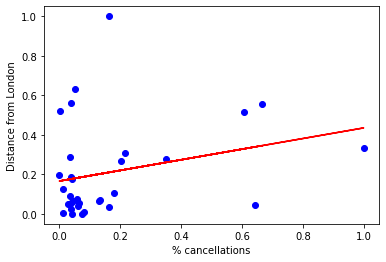

In [ ]:
kms = scaled_df['percent cancel'].tolist()
percnt = scaled_df['Distance'].tolist()
x = np.array(kms)
y = np.array(percnt)


coefficients = np.polyfit(x, y, 1)
m = coefficients[0]
b = coefficients[1]
print("Slope: ", m)
print("Intercept: ", b)


plt.scatter(x, y, color='blue')
plt.plot(x, m*x + b, color='red')
plt.xlabel('% cancellations')
plt.ylabel('Distance from London')
plt.show()

We see there is a small relationship between distance to UK and % cancellations. This should be an indicator to review the delivery process. It's possible that shipping times could be improved, or there are being delays in delivery time leading to cancellations, or many other reasons contributing to cancellations.

We'll get the countries which probably need attention in terms of delivering the product. We'll base it in them having 10 cancellations or more and a cancellation % higher than 5.

USA is a worrying case which should be looked at. Japan and Korea which are close to each other both have a % close to 20. Germany is an important client and is above 5%... This dataframe will most likely help the shops team.


In [ ]:

countries_need_attention = cancellations_per_country[ (cancellations_per_country["percent cancel"] > 5) & (cancellations_per_country["Invoice"] >= 10) ]

countries_need_attention

,Country,Invoice,Quantity,percent cancel,Distance
0,Australia,98,-692,5.47,16976
12,Germany,899,-3357,5.47,933
17,Japan,97,-1505,20.73,9585
18,South Korea,10,-102,18.87,8880
20,Malta,17,-28,6.03,2089
32,USA,126,-1564,30.81,5913
33,United Arab Emirates,33,-593,7.07,5480


###NO NULLS

###Finding about customer ID

Now let's see what is going on with the customer ID null values. We'll create a null and not null DF to compare them.

###nulls creation

In [ ]:
nulls = cleanWithPercentages.loc[(cleanWithPercentages['Customer ID'].isnull())]
nullsDF = nulls.copy()
nullsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226871 entries, 510 to 1000143
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Invoice          226871 non-null  string        
 1   StockCode        226871 non-null  string        
 2   Description      226871 non-null  string        
 3   Quantity         226871 non-null  int64         
 4   InvoiceDate      226871 non-null  datetime64[ns]
 5   Price            226871 non-null  float64       
 6   Customer ID      0 non-null       string        
 7   Country          226871 non-null  object        
 8   Sales            226871 non-null  float64       
 9   Date             226871 non-null  datetime64[ns]
 10  Year             226871 non-null  int64         
 11  Month            226871 non-null  object        
 12  Day              226871 non-null  object        
 13  hour             226871 non-null  int64         
 14  month_year       

These are too many rows to ignore. Except for the null values in ID, we can see perfectly normal operations wich we can't look over, event if a error in the system had eliminated those 228.489 ID's.



###creación not nulls

In [ ]:
notNulls = cleanWithPercentages.loc[(~cleanWithPercentages['Customer ID'].isnull())]
notNullsDF = notNulls.copy()
notNullsDF.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,Date,Year,Month,Day,hour,month_year,% cancellations
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,2009-12-01,2009,Dec,Tuesday,7,2009-12,11.11
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,2009-12-01,2009,Dec,Tuesday,7,2009-12,11.11


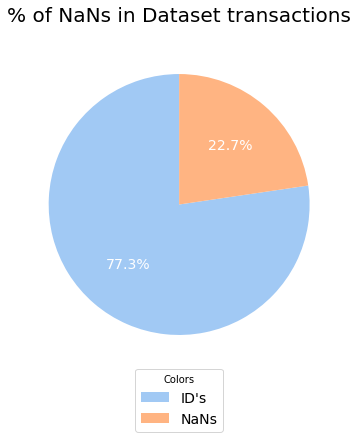

In [ ]:
total = nullsDF.shape[0] + notNullsDF.shape[0]
NaNs = (nullsDF.shape[0] / total * 100)
IDs = 100 - NaNs

drawPieChart("ID's", "NaNs", IDs, NaNs, "% of NaNs in Dataset transactions")


23% of transactions have a null ID. Again something we can't ignore.

We know from the Dataset that this business sells both wholesale and retail. It is possible that wholesalers have to register with an ID to identify them as wholsalers for issues like tax, while retailers can simply proceed to checkout and pay.

Lets see if this is the cause of NaN's, it would be great news to be able to separate the two types of customers as it will make future work easier by further undestanding the dataset.

###Finding out if nulls are retail customers

We'll first filter by invoice to be able to see the difference in baskets. They sould be the key indicator to see the behavioural shopping differences.

In [ ]:
nullsFiltered = pd.DataFrame(nullsDF.groupby(['Invoice']).agg({'Description':'count', "Quantity": "sum", "Sales":"sum"}))
notNullsFiltered = pd.DataFrame(notNullsDF.groupby(['Invoice']).agg({'Description':'count', "Quantity": "sum", "Sales":"sum"}))



To see the differences we'll plot how many products per invoice customers buy. This should tell us showing a much taller tail for wholesale customers.

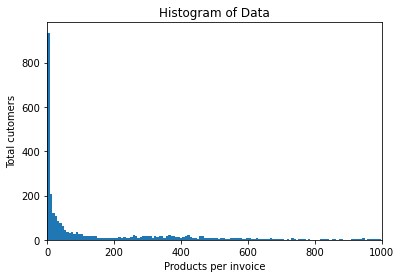

In [ ]:
plt.hist(nullsFiltered["Quantity"], bins=2000)


plt.xlabel('Products per invoice')
plt.ylabel('Total cutomers')
plt.title('Histogram of Data')

plt.xlim(0, 1000)

# Show the plot
plt.show()

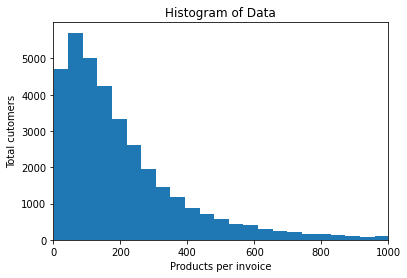

In [ ]:
plt.hist(notNullsFiltered["Quantity"], bins=2000)


plt.xlabel('Products per invoice')
plt.ylabel('Total cutomers')
plt.title('Histogram of Data')

plt.xlim(0, 1000)


plt.show()

We can see a big difference which seems to confirm that the customers with ID's are wholsales customers.

In [ ]:
print("NOT NULLS DESCRIBE: \n ", notNullsFiltered.describe())
print("NULLS DESCRIBE: \n ", nullsFiltered.describe())

NOT NULLS DESCRIBE: 
         Description  Quantity    Sales
count     35865.00  35865.00 35865.00
mean         21.57    283.13   463.94
std          23.05   1006.71   952.61
min           1.00      1.00     0.84
25%           7.00     77.00   163.55
50%          16.00    156.00   304.33
75%          28.00    291.00   477.67
max         541.00  87167.00 44051.60
NULLS DESCRIBE: 
         Description  Quantity    Sales
count      2937.00   2937.00  2937.00
mean         77.25    234.74   890.37
std         122.36    632.34  2374.96
min           1.00      1.00     0.19
25%           3.00      5.00    15.00
50%          19.00     39.00   182.51
75%         120.00    311.00  1200.48
max        1113.00  14149.00 52940.94


Despite the difference being clear, we see some values which don't make sense.

For example wee see that the average price for nulls is double than not nulls which would not make sense. Also, product quantity average is very similar. Lets keep exploring.

We'll create a dataframe for comparisons.

In [ ]:
keyDF = pd.DataFrame(columns=['Total Ind prods bought |', "% Ind prods bought |", '% Quantity Ind prods bought |', '% prods vs quantity |'])

In [ ]:
keyDF = keyDF.rename(index={0: 'Wholesale', 1: "Retail"})

We'll create some interesting statistics to see the differences.

In [ ]:
notNullstotalUniqueProds = notNullsFiltered["Description"].sum()
nullsTotalUniqueProds = nullsFiltered["Description"].sum()
notNullstotalProds = notNullsFiltered["Quantity"].sum()
nullsTotalProds = nullsFiltered["Quantity"].sum()

This percentage tells us the the % of individual products per total quantity of products per invoice.

In [ ]:
percentNotNulls = notNullstotalUniqueProds / notNullstotalProds * 100
percentNulls = nullsTotalUniqueProds / nullsTotalProds * 100

In [ ]:
QuantityTotalNulls = nullsFiltered["Quantity"].sum()
QuantityTotalNotNulls = notNullsFiltered["Quantity"].sum()
ProductTotalNulls = nullsFiltered["Description"].sum()
ProductTotalNotNulls = notNullsFiltered["Description"].sum()

In [ ]:
keyDF.loc['Wholesale', 'Total Ind prods bought |'] = notNulls.shape[0]
keyDF.loc["Retail", 'Total Ind prods bought |'] = nulls.shape[0]
keyDF.loc['Wholesale', '% Ind prods bought |'] = 77
keyDF.loc["Retail", '% Ind prods bought |'] = 23
keyDF.loc['Wholesale', '% Quantity Ind prods bought |'] = 100 - (QuantityTotalNulls / QuantityTotalNotNulls * 100)
keyDF.loc["Retail", '% Quantity Ind prods bought |'] = QuantityTotalNulls / QuantityTotalNotNulls * 100
keyDF.loc['Wholesale', '% prods vs quantity |'] = percentNotNulls
keyDF.loc["Retail", '% prods vs quantity |'] = percentNulls

In [ ]:
keyDF

,Total Ind prods bought |,% Ind prods bought |,% Quantity Ind prods bought |,% prods vs quantity |
Wholesale,773627,77,93.21,7.62
Retail,226871,23,6.79,32.91


In [ ]:
print("Being 23% of individual items sold, retail customers amounts for only ", (QuantityTotalNulls / QuantityTotalNotNulls * 100),"% of total products sold")

Being 23% of individual items sold, retail customers amounts for only  6.789226521214074 % of total products sold


We find some interesting information to take a look at.

- Being 23% of individual items sold, retail customers amounts for only  6.6% of total products sold
- The % of individual products per invoice is 4 times lower for suspected wholesale which makes sense.


Lets see the distribution for individual items per invoice to further see if they are actually wholesale and retail.

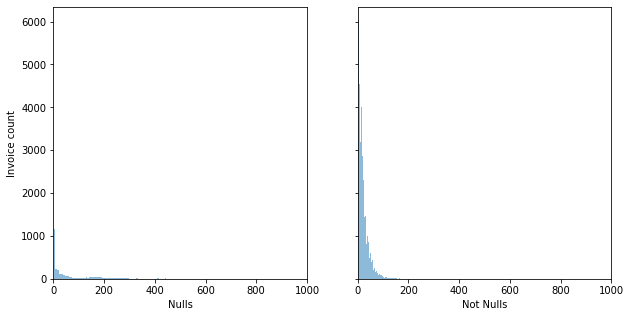

In [ ]:
plot_histograms(nullsFiltered, notNullsFiltered, "Description", bins=150, xlabel1='Nulls', xlabel2="Not Nulls", ylabel="Invoice count")

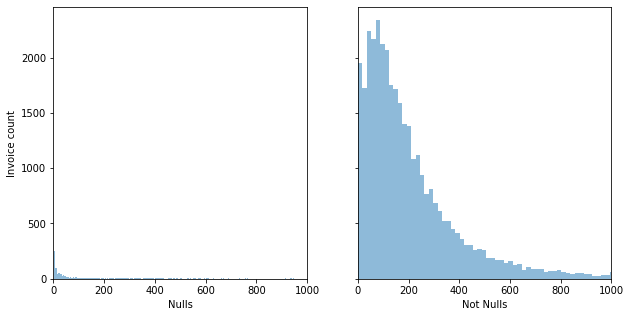

In [ ]:
plot_histograms(nullsFiltered, notNullsFiltered, "Quantity", bins=5000, xlabel1='Nulls', xlabel2="Not Nulls", ylabel="Invoice count")



We see a clear difference between both groups.

###Filtering by quantiles

We suspect that its possible that the confusing numbers are occurring because some wholesale customers are not registering as such. This could be an interesting insight for the shop to know.

In [ ]:
# cutoff = nullsFiltered['Quantity'].quantile(0.8)
# sus_wholesale = nullsFiltered[nullsFiltered['Quantity'] > cutoff]
# retail = nullsFiltered[nullsFiltered['Quantity'] < cutoff]


We'll filter by 30 products per invoice to filter between wholesale and retail and see the differences between the shops.

In [ ]:
Normal_retail = nullsFiltered[ nullsFiltered['Quantity'] <= 30 ]
susWholesale = nullsFiltered[ nullsFiltered['Quantity'] > 30 ]

In [ ]:
Normal_wholesale = notNullsFiltered[ notNullsFiltered['Quantity'] > 30 ]
sus_retail = notNullsFiltered[ notNullsFiltered['Quantity'] <= 30 ]

NO ID's

We'll se the differences between shoppers without ID which behave as normal retail and not.

In [ ]:
#Percentage of invoices
total = Normal_retail.shape[0] + susWholesale.shape[0]
percentRetailInv = int(Normal_retail.shape[0] / total * 100)
percentSusInv = 100 - percentRetailInv


#Percent of total sales
total = Normal_retail["Sales"].sum() + susWholesale["Sales"].sum()
percentRetailSales = int(Normal_retail["Sales"].sum() / total * 100)
percentSusSales = 100 - percentRetailSales

#Average payment per invoice
avge_retail = int(Normal_retail["Sales"].mean())
avge_sus_wholesale = int(susWholesale["Sales"].mean())

print(f"-PERCENTAGE OF INVOICES: \n\n SUS WHOLESALE - {percentSusInv}% \n RETAIL - {percentRetailInv}% \n\n -PERCENTAGE OF SALES: \n\n SUS WHOLESALE - {percentSusSales}% \n RETAIL - {percentRetailSales}%\n\n -AVGE PAYMENT PER INVOICE: \n\n SUS WHOLESALE - {avge_sus_wholesale}$  \n RETAIL - {avge_retail}$")


-PERCENTAGE OF INVOICES: 

 SUS WHOLESALE - 53% 
 RETAIL - 47% 

 -PERCENTAGE OF SALES: 

 SUS WHOLESALE - 97% 
 RETAIL - 3%

 -AVGE PAYMENT PER INVOICE: 

 SUS WHOLESALE - 1629$  
 RETAIL - 62$


We see how now the 179$ average payment per invoice makes sense for Retail customers. Interesting how being 51% of invoices they account for 92% if sales.

This makes sense and could confirm that there are many customers which are identifying as wholesalers and really aren't.

###copia nulls not nulls

In [ ]:
nullsGoodDF = nulls.copy()
notNullsGoodDF = notNulls.copy()

###TIME SERIES SALES AND DEMAND:



Finally we are going to compare the seasonal spending per group to see how the different patterns confirm two different groups of customers.

In [ ]:
dfGrouped = pd.DataFrame(cleanWithPercentages.groupby(['Invoice']).agg(Total_Sales_Revenue=('Sales', 'sum'),
                                                                                 Total_Quantity=('Quantity', 'sum'),
                                                                                 Different_items=('Description', 'count'),
                                                                                 Average_Item_Price=('Price', 'mean'),
                                                                                 Average_Quantity=('Quantity', 'mean'),
                                                                                 Month=('month_year', "first")))



We'll filter them by 30 products per invoice for wholesale and vive versa.

In [ ]:
retailInv = dfGrouped[ dfGrouped['Total_Quantity'] <= 30 ]
wholesalers = dfGrouped[ dfGrouped['Total_Quantity'] > 30 ]


We do a check to see which months will incurr in maximum demand.

Text(0.5, 1.0, 'RETAILERS')

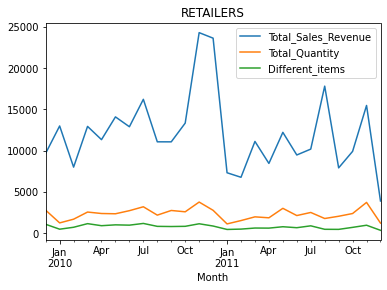

In [ ]:
dfForTimeseriesRetail = pd.DataFrame( retailInv.groupby(['Month']).agg({'Total_Sales_Revenue':'sum', 'Total_Quantity':'sum', 'Different_items':"sum"})).reset_index()
dfForTimeseriesRetail.plot(x='Month')
plt.title("RETAILERS")

Text(0.5, 1.0, 'WHOLESALERS')

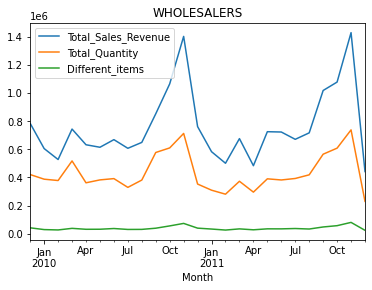

In [ ]:
dfForTimeseriesWholesale = pd.DataFrame( wholesalers.groupby(['Month']).agg({'Total_Sales_Revenue':'sum', 'Total_Quantity':'sum', 'Different_items':"sum"})).reset_index()
dfForTimeseriesWholesale.plot(x='Month')
plt.title("WHOLESALERS")

We see an impoortant difference in the order and seasonality of both groups. We can tell the shop to look out for big buys from customers with no ID. They are very valuable to the company and to be able to identify them, send them offers, and develop a relationship will be important and generate revenue from the shop.

#Country

###By Country

We see that the UK clerly has the most sales and how neighbouring european countries account for most of the foreign sales.

We'll first group by country.

In [ ]:
df_countries = cleanWithPercentages.groupby("Country").agg({"Sales": "sum"})
df_countries

Then filter to only get the top selling countries.

In [ ]:
topCountries = df_countries[ df_countries['Sales'] > 100000 ]
bottomCountries = df_countries[ df_countries['Sales'] < 100000 ]
others = bottomCountries["Sales"].sum()

Now append the grouped less selling countries to the top ones

In [ ]:
others_row = {"Country": "others", "Sales" :others}
topCountries.loc[len(topCountries)] = others_row
topCountries = topCountries.rename(index={6: 'Others'})

Reset index so it can be read by the pie chart.

In [ ]:
topCountries = topCountries.reset_index()

And create the pie chart.

In [ ]:


fig = go.Figure(data=[go.Pie(labels=topCountries['Country'], values=topCountries['Sales'], hole=.3)])
fig.update_layout(title_text='Sales by Country')

# show the plot
fig.show()

We see a clear majority of UK sales. The UK market is what is driving succss and could possibly be focused on to achieve more success. Concentrating resources and handing offers possible due to not having to go through customs.

We see that most of the best selling countries except Australia are close european neighbours. Possibly trying to get a foothold on those markets could be important.



###Best customer

Now lets study and see which customers are best. For this we'll only be able to use not null values. We'll filter and see the importance of top customers.



In [ ]:
Sales_Customer = cleanWithPercentages.groupby(['Customer ID']).agg({'Sales':'sum'}).sort_values('Sales', ascending=False)
Sales_Customer


,Sales
Customer ID,
18102.0,580987.04
14646.0,525594.16
14156.0,303367.19
14911.0,272256.69
17450.0,237501.27
...,...
15040.0,7.49
15913.0,6.30
13788.0,3.75


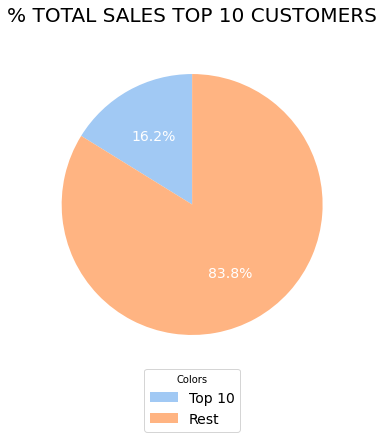

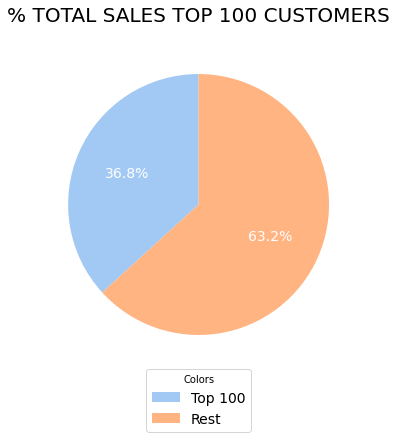

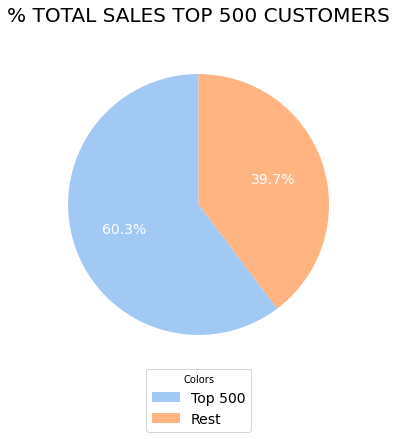

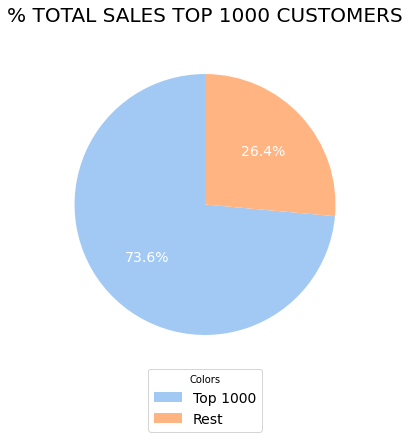

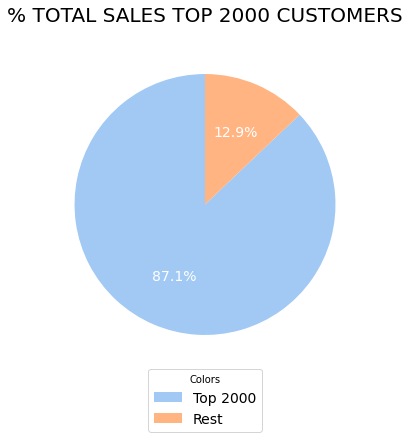

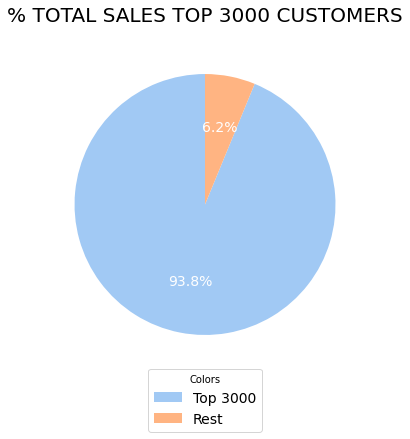

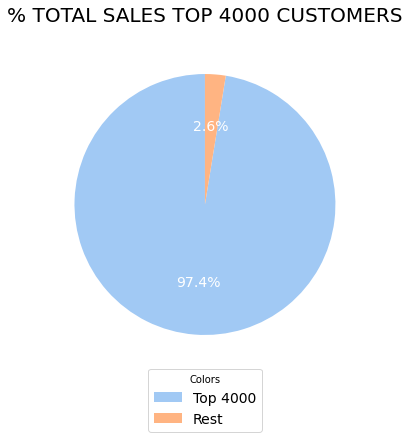

In [ ]:
def filterPieChart(list, df):
  for i in list:
    filtered_prods = df.groupby('Customer ID').agg({'Sales':'sum'}).sort_values("Sales", ascending=False)[0:i]
    all_prods = df.groupby('Customer ID').agg({"Sales": "sum"})
    percentFiltP = filtered_prods["Sales"].sum() / all_prods["Sales"].sum() * 100
    percentAllP = 100 - percentFiltP
    drawPieChart(f"Top {i}", "Rest", percentFiltP, percentAllP, f"% TOTAL SALES TOP {i} CUSTOMERS")



filterPieChart([10,100, 500, 1000, 2000, 3000, 4000], Sales_Customer)





The top 10 customers out of 5878 account for 16.2% of the sales. The shop will certainly have to be on the lookout for them.

We can see how just the top customers which are only 1.7% account for 32.7% of the sales. This is a good indicator that the shop should focus on these types of customers. Offers, looking for competitors to offer them special terms and products, etc...



Now lets see if more baskets == more sales for top customers. Lets group by customer and order in terms of number of invoices so that we can see if the top buying customers are the top profit customers.

In [ ]:
Customer_Order = cleanWithPercentages.groupby('Customer ID').agg({'Invoice': ['nunique'],
                                      'Invoice': 'count', 'Sales':'sum'}).rename(columns={'Invoice':'Total_Order'}).sort_values('Total_Order', ascending=False)[0:10]
Customer_Order.head(2)

,Total_Order,Sales
Customer ID,,
17841.0,12378,68131.36
14911.0,10930,272256.69


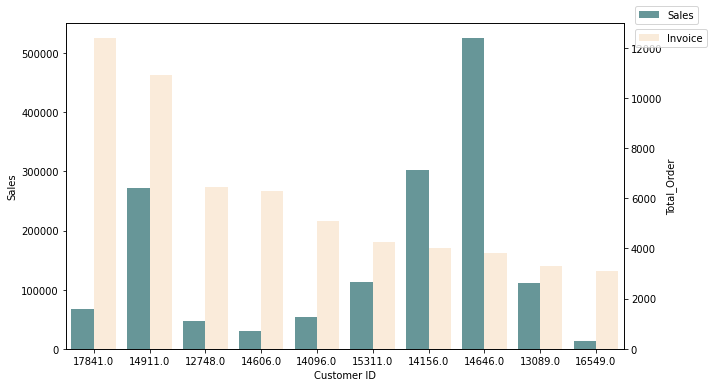

In [ ]:
col1 = 'cadetblue'
col2 = 'bisque'

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=Customer_Order.index, y=Customer_Order.Sales, data=Customer_Order, label='Sales', color = col1)
width_scale = 0.5
for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width_scale)
    ax.legend(bbox_to_anchor=(1.02, 1.05), loc='upper left', borderaxespad=0)

ax2 = ax.twinx()
sns.barplot(x =Customer_Order.index, y = Customer_Order.Total_Order, data=Customer_Order, alpha=0.7, color = col2, label = 'Invoice', ax=ax2)
for bar in ax2.containers[0]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1- width_scale))
    bar.set_width(w * width_scale)
    ax2.legend(bbox_to_anchor=(1.02, 0.98), loc='upper left', borderaxespad=0)
plt.show()

We see that definitely more purchases does not equal more sales.

Dividing by year, we saw that the total number of invoices ordered by customers has increased slightly from year to year (year records for 2011 haven't finished the complete year).

In [ ]:
Buys_per_year = cleanWithPercentages.groupby(['Year']).agg({'Invoice':'count' }).sort_values('Invoice', ascending=False)
Buys_per_year

,Invoice
Year,
2011,480603
2010,476698
2009,43197


#Best products

We find out which are the top selling products.

Now we'll see how much of the total sales do top products englobe. Lets see the distribution of sales between products.

In [ ]:
best_prods = cleanWithPercentages.groupby('Description').agg({'Sales':'sum', "Quantity":"sum"}).sort_values("Sales", ascending=False)




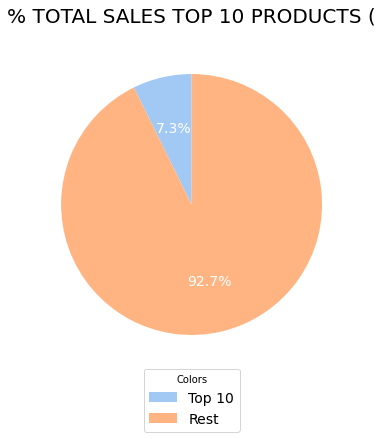

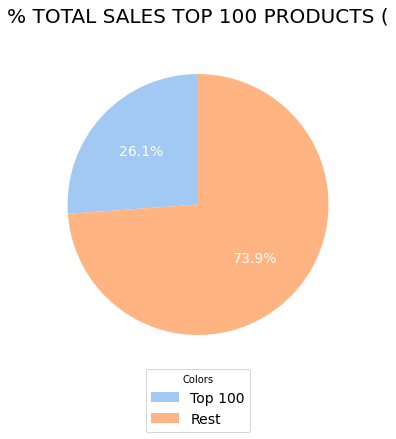

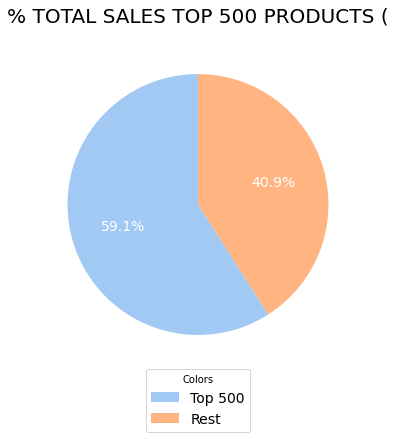

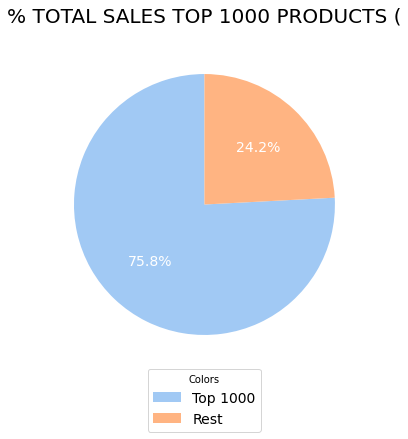

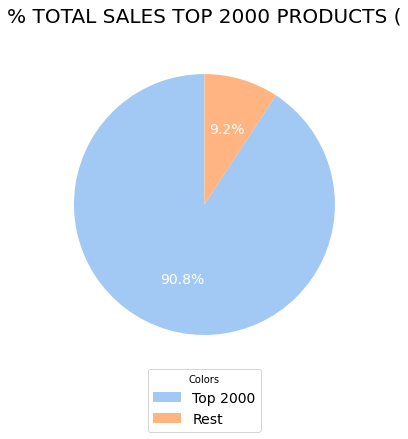

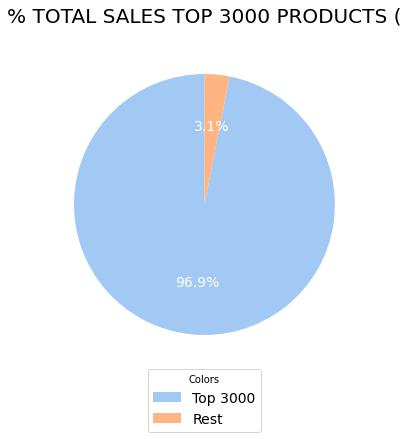

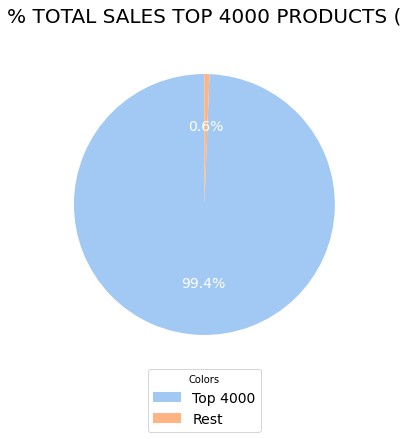

In [ ]:
def filterPieChart(list, df1):
  for i in list:
    filtered_prods = df1.groupby('Description').agg({'Sales':'sum', "Quantity":"sum"}).sort_values("Sales", ascending=False)[0:i]
    all_prods = df1.groupby("Description").agg({"Sales": "sum", "Quantity": "sum"})
    percentFiltP = filtered_prods["Sales"].sum() / all_prods["Sales"].sum() * 100
    percentAllP = 100 - percentFiltP
    drawPieChart(f"Top {i}", "Rest", percentFiltP, percentAllP, f"% TOTAL SALES TOP {i} PRODUCTS (")



filterPieChart([10,100, 500, 1000, 2000, 3000, 4000], cleanWithPercentages)


We see how uneven the distribution in sales is with the top selling and bottom products. More than a 1000 products account just for 0.1% of sales. It would probably benefit the shop to get rid of most of the stock and concentrate only on top selling to save costs in storage and maintenance. Giving less options to customers and pushing offers on best performing products would also be helpful.

Out of curiosity, lets see if there a difference between wholesale and retail.

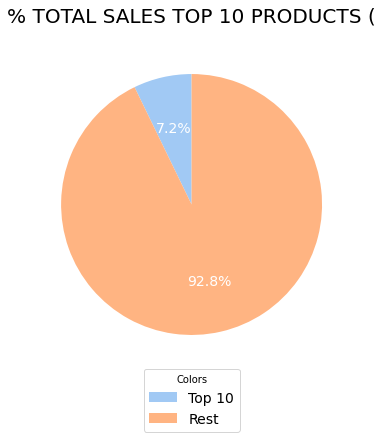

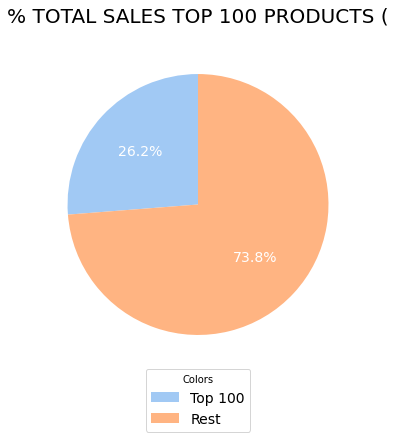

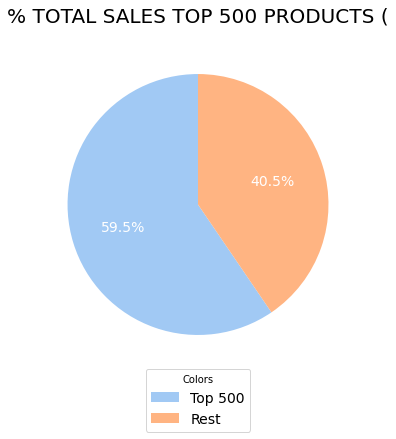

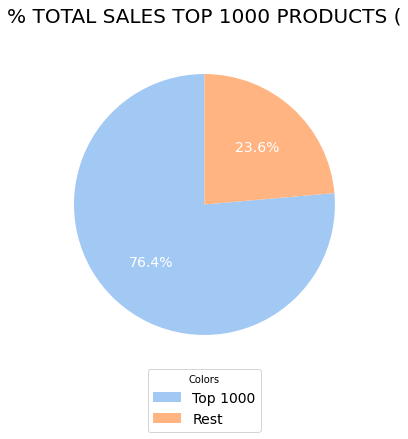

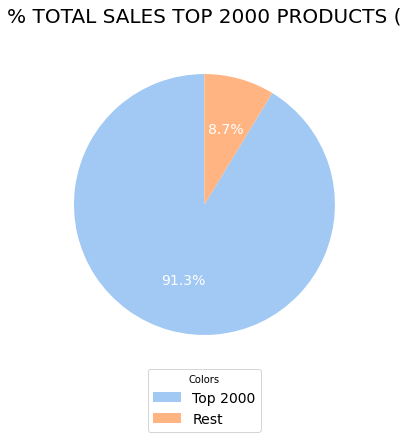

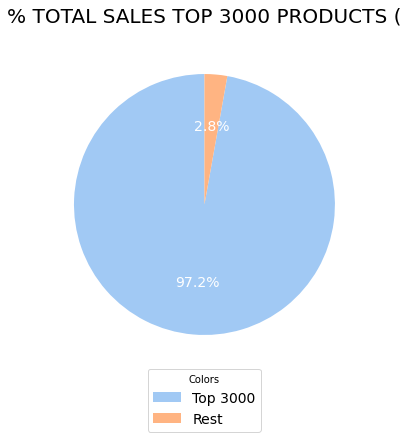

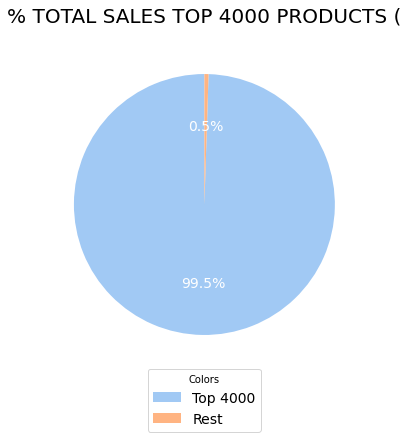

In [ ]:
def filterPieChartWhole(list):
  for i in list:
    filtered_prods = notNulls.groupby('Description').agg({'Sales':'sum', "Quantity":"sum"}).sort_values("Sales", ascending=False)[0:i]
    all_prods = notNulls.groupby("Description").agg({"Sales": "sum", "Quantity": "sum"})
    percentFiltP = filtered_prods["Sales"].sum() / all_prods["Sales"].sum() * 100
    percentAllP = 100 - percentFiltP
    drawPieChart(f"Top {i}", "Rest", percentFiltP, percentAllP, f"% TOTAL SALES TOP {i} PRODUCTS (")



filterPieChartWhole([10,100, 500, 1000, 2000, 3000, 4000])

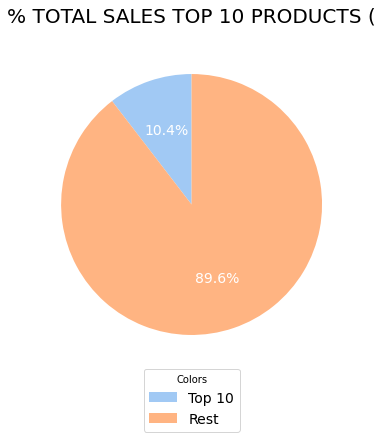

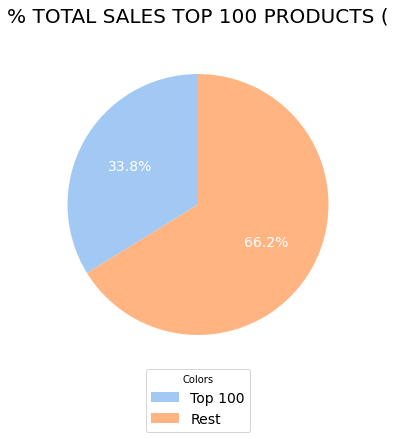

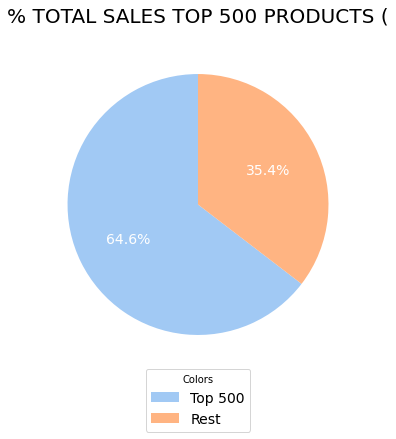

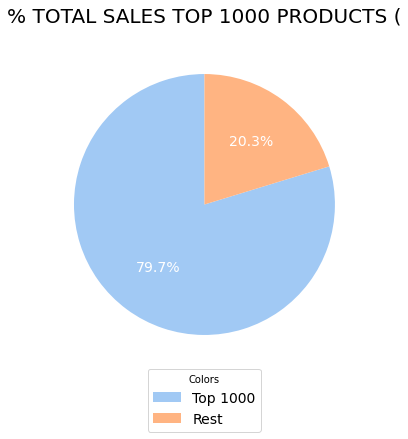

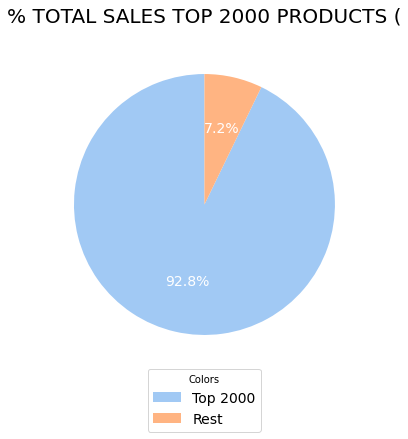

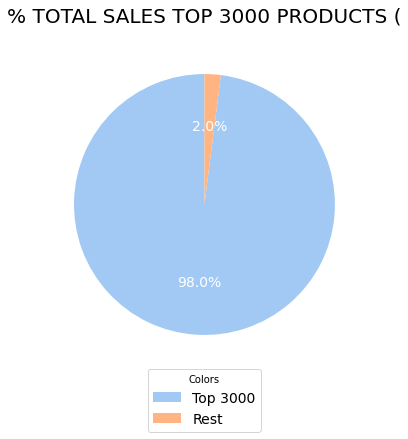

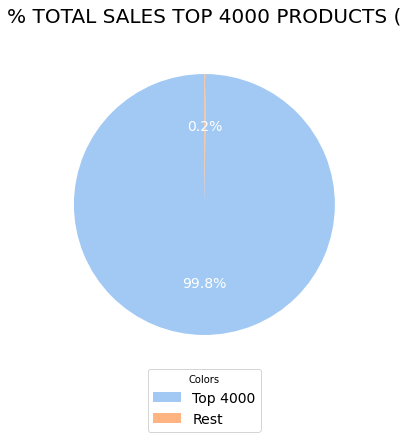

In [ ]:
def filterPieChartRet(list):
  for i in list:
    filtered_prods = nulls.groupby('Description').agg({'Sales':'sum', "Quantity":"sum"}).sort_values("Sales", ascending=False)[0:i]
    all_prods = nulls.groupby("Description").agg({"Sales": "sum", "Quantity": "sum"})
    percentFiltP = filtered_prods["Sales"].sum() / all_prods["Sales"].sum() * 100
    percentAllP = 100 - percentFiltP
    drawPieChart(f"Top {i}", "Rest", percentFiltP, percentAllP, f"% TOTAL SALES TOP {i} PRODUCTS (")



filterPieChartRet([10,100, 500, 1000, 2000, 3000, 4000])

Lets see it better with percentages

In [ ]:
def findTopProducts(bestIDs, filt_num, df):
  numberOfSales = []
  allSalesDF = pd.DataFrame()
  for i in bestIDs:
    df_cust = df[df['Customer ID'] == i]
    df_cust_prods = df_cust.groupby("Description").agg({"Sales": "sum", "Description": "first"}).sort_values("Sales", ascending=False)[0:filt_num]
    df_concat = pd.concat([allSalesDF, df_cust_prods], ignore_index=True)
    allSalesDF = df_concat
  finalDF = allSalesDF.groupby("Description").agg({"Sales":"sum"}).sort_values("Sales", ascending=False)
  return finalDF

topCustomers = cleanWithPercentages.groupby("Customer ID").agg({"Description" : "first", "Sales": "sum", "Quantity": "sum"}).sort_values("Sales",ascending=False)[0:50]
topCustomers = topCustomers.reset_index()
bestIDs = topCustomers["Customer ID"].tolist()
top_products = findTopProducts(bestIDs, 30, df)
top_products = top_products.reset_index()[0:10]
top_products

,Description,Sales
0,REGENCY CAKESTAND 3 TIER,108495.60
1,WHITE HANGING HEART T-LIGHT HOLDER,77419.19
2,JUMBO BAG RED RETROSPOT,55256.94
3,ASSORTED COLOUR BIRD ORNAMENT,41459.60
4,PICNIC BASKET WICKER 60 PIECES,39619.50
5,VINTAGE UNION JACK MEMOBOARD,34050.53
6,ROTATING SILVER ANGELS T-LIGHT HLDR,31016.32
7,BLACK RECORD COVER FRAME,29539.32
8,JUMBO BAG STRAWBERRY,28981.42
9,WOOD BLACK BOARD ANT WHITE FINISH,26655.90


In [ ]:
def seeTopProducts(top_prods, all_prods):
  fig = sp.make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],subplot_titles=("Top Customers", "All Customers"))
  fig.add_trace(go.Pie(labels=top_products['Description'], values=top_products['Sales'], hole=.3, name="TopCustomers"), 1, 1)
  fig.add_trace(go.Pie(labels=all_Top_prods['Description'], values=all_Top_prods['Sales'], hole=.3, name="AllCustomers"), 1, 2)
  fig.update_layout(title_text='Top selling products')
  fig.show()



all_Top_prods = cleanWithPercentages.groupby("Description").agg({"Sales": "sum"}).sort_values("Sales", ascending=False)[0:10]
all_Top_prods = all_Top_prods.reset_index()
seeTopProducts(top_products, all_Top_prods)



We see a very prominent lead with the Little Birdie papercraft. Telling of the wholesalers with their bulk buying involved, isa big change with the sales percentage sales being more than x2 for that product. It would be interesting to get similar articles in stock and offer some good deals to try to lure in more customers and of course see if sales are affected positively.

Lets take a look at the average amount spent on Little vierdies per invoice and see.

Almost 8%, this is important as 10 out of 5395 products account for that much. This could be an indicator for the shop to concentrate on certain products to minize stock costs and increase sales.

There are probably many products which are costing the company money.

###NLP eliminando product variations.

We also use Spacy to harness NLP for filtering out those rows which will not end in normal shop transacations.

We manage to get rid of a further 85 rows. This was not done yet so to not eliminate product descriptions and understand cancellations/negative invoices.

In [ ]:
nlp = spacy.load("en_core_web_sm")


non_product_keywords = ["BANK FEES", "ADJUSTMENT", "POSTAGE", "DISCOUNT", "MANUAL", "CARRIAGE", "COMMISSION"]

def is_non_product_transaction(text):
    text = text.upper()

    for keyword in non_product_keywords:
        if keyword in text:
            return True

    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "MONEY":
            return False

    return True


df = df[df["Description"].apply(is_non_product_transaction)]


#SEGMENTATION:

In [ ]:
#Later Use

df = pd.read_pickle("/content/ForCollabFinalDayAllClean.pkl")
notNullsDF = df[df['Customer ID'].notnull()]

#RFM

###Creación DF

###Calculate values per customer

Lets see the start and end values for the period.

In [ ]:
print('Start date:' , df['InvoiceDate'].min())
print('End date:' , df['InvoiceDate'].max())

Start date: 2009-12-01 07:45:00
End date: 2011-12-09 12:50:00


Lets create the RFM Dataframe with the Recency, Monetary, and Frequency column.

In [ ]:
RFM_DF = pd.DataFrame()

In [ ]:
merged_df = df.merge(RFM_DF['RFM_Label'], on='Customer ID', how='left')

In [ ]:
merged_df.to_pickle("CompleteDFwithRFMLabels.pkl")

In [ ]:
RFM_DF

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,rfm_score,RFM_Label
Customer ID,,,,,,,,
12346.0,528,32,371.86,1,2,2,122,Low_priority_client
12347.0,1,222,4921.53,5,5,5,555,Top_client
12348.0,74,46,1658.40,3,3,4,334,Quality_client
12349.0,17,172,3678.69,5,4,5,545,Top_client
12350.0,309,16,294.40,2,1,2,212,Low_priority_client
...,...,...,...,...,...,...,...,...
18283.0,2,936,2658.95,5,5,4,554,Quality_client
18284.0,430,28,461.68,1,2,2,122,Low_priority_client
18285.0,659,12,427.00,1,1,2,112,Low_priority_client


In [ ]:
#Monetary

monetary = notNullsDF.groupby('Customer ID').agg({'Sales': "sum"})
RFM_DF["Monetary"] = monetary

In [ ]:
#Recency
recency = notNullsDF.groupby('Customer ID').agg({'InvoiceDate': "max"})
reference_date = pd.Timestamp('2011-12-09')
RFM_DF["Recency"] = reference_date - recency
RFM_DF["Recency"] = RFM_DF["Recency"].dt.days

In [ ]:
#Frequency
customer_frequency = notNullsDF.groupby(['Customer ID']).agg({"Invoice":"count"})
RFM_DF["Frequency"] = customer_frequency

In [ ]:
RFM_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5842 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Monetary   5842 non-null   float64
 1   Recency    5842 non-null   int64  
 2   Frequency  5842 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 182.6 KB


###Bins

Lets create the bins for the RFM analysis. We'll divide in 5 different percentiles.

In [ ]:

RFM_DF['Recency_score'] = pd.qcut(RFM_DF['Recency'], 5, labels=[5, 4, 3, 2, 1])

RFM_DF['Monetary_score'] = pd.qcut(RFM_DF['Monetary'], 5, labels=[1, 2, 3, 4, 5])

RFM_DF['Frequency_score'] = pd.qcut(RFM_DF['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])


In [ ]:
RFM_DF['rfm_score'] = RFM_DF["Recency_score"].astype(str) + RFM_DF['Frequency_score'].astype(str) + RFM_DF['Monetary_score'].astype(str)


RFM_DF.insert(2, 'Monetary', RFM_DF.pop('Monetary'))
RFM_DF.insert(5, 'Monetary_score', RFM_DF.pop('Monetary_score'))
RFM_DF.insert(3, 'Recency_score', RFM_DF.pop('Recency_score'))
RFM_DF.insert(0, 'Recency', RFM_DF.pop('Recency'))
#RFM_DF = RFM_DF.drop("InvoiceDate", axis="columns")

In [ ]:
RFM_DF.head(3)

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,rfm_score
Customer ID,,,,,,,
12346.0,528,32,371.86,1,2,2,122
12347.0,1,222,4921.53,5,5,5,555
12348.0,74,46,1658.40,3,3,4,334


Lets see the weight of champions with a "555" RFM score in the dataset.

We see there are 421 (7%) out of 5878 and they responsible for 44.5% of sales.

In [ ]:
#Percent Sales champions
champions = RFM_DF[RFM_DF['rfm_score'] == '555']
percentSales = champions["Monetary"].sum() / RFM_DF["Monetary"].sum() * 100
print("% sales", percentSales)

#Percent wholesale clients
percentChampions = champions.shape[0] / RFM_DF.shape[0] * 100
print("% champions", percentChampions)



% sales 44.99042999476854
% champions 7.309140705237932


In [ ]:
champions.shape[0]

421

#RFM averages

Lets see the bin averages to see if they make sense for clasification.

In [ ]:
def findbinaverages(df, binColumn, valueColumn):
  for i in range(1,6):
    new_DF = df[df[binColumn] == i]
    mean = new_DF[valueColumn].mean()
    print(f"{valueColumn} value of bin {i} = {mean}")


print("FREQUENCY: \n")
Frequency_avgs = findbinaverages(RFM_DF, 'Frequency_score', "Frequency")
print("\nRECENCY:\n ")
Recency_avgs = findbinaverages(RFM_DF, 'Recency_score', "Recency")
print("\nMONETARY:\n ")
Monetary_avgs = findbinaverages(RFM_DF, 'Monetary_score', "Monetary")





FREQUENCY: 

Frequency value of bin 1 = 8.50727117194183
Frequency value of bin 2 = 25.738869863013697
Frequency value of bin 3 = 53.288527397260275
Frequency value of bin 4 = 114.39383561643835
Frequency value of bin 5 = 460.0222412318221

RECENCY:
 
Recency value of bin 1 = 543.2115219260534
Recency value of bin 2 = 308.3737201365188
Recency value of bin 3 = 106.24828178694158
Recency value of bin 4 = 35.16077738515901
Recency value of bin 5 = 7.815854665565648

MONETARY:
 
Monetary value of bin 1 = 161.88707692307693
Monetary value of bin 2 = 418.7101208226221
Monetary value of bin 3 = 871.8703013698631
Monetary value of bin 4 = 1864.595096746575
Monetary value of bin 5 = 10919.639171086399


We see values that certainly make sense and can be considered good for labeling clients.

###Custon RFM

Now we'll create the necessary labels for labelling our clients. We'll segment into 5 labels. We'll do this RFM segmentation in a custom way for the shop. We'll take into account that recency and frequency are not as important as monetary. We have seen how buying more products doesn't equate to more sales, and that some customers have very expensive baskets which they buy a few times a year. This means that when labelling clients, monetary should be the most important and inflexible value, while frequency and recency can be flexible to it.

- Low priority: Those clients which don't have much value to the company.

- Quality Client - Those clients which start to have an impact on sales and could be lured to spend more. These clients include clients with a 4 in monetary and a combination of 3 or more for the rest of categories.

- Top client - In this case it includes all possible combinations of 5 and we'll go as down as 2 for frequency to count as top client. Not so much with recency which will go down to 3.

- Loosing client - This is a combination of 4-5 monetary and all low values on frequency and recency.


In [ ]:
def selection(value):
  if value in ['555', '335', '435', '535', '545', '355', '455', "525", "425", "325", "345", "445" ]:
        return "Top_client"
  elif value in ['444', '344', '334', "554", "454", "544", "434", "354", "354", "534", "424"]:
        return "Quality_client"
  elif value in ['515', "155","115","235","154", "145", "254", "144", "244", "524", "125", '415', '315', "135", '215', "225", "245", "255", "135" "115", '514', '414', '314', "214", "114", "124", "134", "224","234","324"]:
        return "ImportantClient_loosing"
  else:
    return "Low_priority_client"


RFM_DF["RFM_Label"] = RFM_DF['rfm_score'].apply(selection)

In [ ]:
Low_priorities = RFM_DF[RFM_DF["RFM_Label"] == "Low_priority_client"]
Quality_clients = RFM_DF[RFM_DF["RFM_Label"] == "Quality_client"]
top_clients = RFM_DF[RFM_DF["RFM_Label"] == "Top_client"]
loosing_clients = RFM_DF[RFM_DF["RFM_Label"] == "ImportantClient_loosing"]


In [ ]:
print("AVERAGE MONETARY PER CLIENT: \n")
print("Low Priority = ",Low_priorities["Monetary"].mean())
print("Quality client = ",Quality_clients["Monetary"].mean())
print("Top client = ", top_clients["Monetary"].mean())
print("Loosing client = ", loosing_clients["Monetary"].mean())

print("\nAVERAGE RECENCY PER CLIENT:\n")
print("Low Priority = ",Low_priorities["Recency"].mean())
print("Quality client = ",Quality_clients["Recency"].mean())
print("Top client = ", top_clients["Recency"].mean())
print("Loosing client = ", loosing_clients["Recency"].mean())

print("\nAVERAGE FREQUENCY PER CLIENT:\n")
print("Low Priority = ",Low_priorities["Frequency"].mean())
print("Quality client = ",Quality_clients["Frequency"].mean())
print("Top client = ", top_clients["Frequency"].mean())
print("Loosing client = ", loosing_clients["Frequency"].mean())
totalclients = RFM_DF.shape[0]
print("\nNUMBER OF CLIENTS:\n")
print("Low Priority = ", round(Low_priorities.shape[0] / totalclients * 100),"%")
print("Quality client = ",round(Quality_clients.shape[0] / totalclients * 100),"%")
print("Top client = ", round(top_clients.shape[0] / totalclients * 100),"%")
print("Loosing client = ", round(loosing_clients.shape[0] / totalclients * 100),"%")
totalsales= RFM_DF["Monetary"].sum()
print("\n%SALES:\n")
print("Low Priority = ", round(Low_priorities["Monetary"].sum() / totalsales * 100),"%")
print("Quality client = ",round(Quality_clients["Monetary"].sum() / totalsales * 100),"%")
print("Top client = ", round(top_clients["Monetary"].sum() / totalsales * 100),"%")
print("Loosing client = ", round(loosing_clients["Monetary"].sum() / totalsales * 100),"%")

AVERAGE MONETARY PER CLIENT: 

Low Priority =  483.9906142653353
Quality client =  1908.3380649819494
Top client =  11337.082434574977
Loosing client =  3239.9804422657953

AVERAGE RECENCY PER CLIENT:

Low Priority =  268.64279600570615
Quality client =  50.01083032490975
Top client =  32.190066857688635
Loosing client =  325.1721132897604

AVERAGE FREQUENCY PER CLIENT:

Low Priority =  39.311840228245366
Quality client =  150.72322503008422
Top client =  434.8987583572111
Loosing client =  120.3681917211329

NUMBER OF CLIENTS:

Low Priority =  60 %
Quality client =  14 %
Top client =  18 %
Loosing client =  8 %

%SALES:

Low Priority =  10 %
Quality client =  10 %
Top client =  71 %
Loosing client =  9 %


In [ ]:
RFM_DF

NameError: ignored

Finally we see the values and they make sense for the labelling. We see how a 60% of clients are low priotity and how we have a group of champions which is formed by 18% of customers and accounts for 70% of sales. This groups values are very similiar to those of the top bin seen before.

Loosing clients should be aimed to brought back as they are only 8% and account for 10% of sales.

This seems to signal that the company should focus on gaining more top clients as they will requite much less investment and will reap much better rewards.



###Clustering with K-means

Now we'll go on with some clustering methods to be able to see if there is some relationship between clients that we didn't see wit the RFM.

We'll use k-means and will transform the continous three columns in a logarithmic way. This is because after many different transformation methods and clustering, due to some extreme outliers in both monetary and recency, results  didn't make sense.

Finally, logarithmic transformation seemed to make the most sense as it transformed taking care of outliers in an appropiate manner.



In [ ]:
RFM_DF_cont = RFM_DF.copy()

First, some values were found in recency which equated to -1, so lets change them to 0.

In [ ]:
neg_values = RFM_DF_cont['Recency'] < 0

RFM_DF_cont.loc[neg_values, 'Recency'] = 0

In [ ]:
RFM_DF_cont = RFM_DF_cont.filter(["Recency", "Frequency", "Monetary"], axis="columns")
RFM_DF_cont["Monetary"] = RFM_DF_cont["Monetary"].astype(int)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# df_cont = pd.DataFrame(scaler.fit_transform(RFM_DF_cont), columns=RFM_DF_cont.columns)


# df_cont


In [ ]:
# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()

# scaler.fit(RFM_DF)

# df_cont = pd.DataFrame(scaler.transform(RFM_DF), columns=RFM_DF.columns)

# df_cont

In [ ]:

# from sklearn.cluster import KMeans
# from sklearn.metrics import calinski_harabasz_score

# def CalinskyScorer(df):
#   results = []
#   for i in range(2, 11):
#     df2 = df.copy()
#     model = KMeans(n_clusters=i)
#     model.fit(df2)
#     score = calinski_harabasz_score(df2, model.labels_)
#     results.append(f"Cluster {i} has a score of: {score}.")
#   for item in results:
#     print(item)



# CalinskyScorer(df_cont)

Cluster 2 has a score of: 7280.57316551937.
Cluster 3 has a score of: 8280.031208282566.
Cluster 4 has a score of: 8203.199159190455.
Cluster 5 has a score of: 8850.285309888894.
Cluster 6 has a score of: 9523.490838486656.
Cluster 7 has a score of: 10786.067114428859.
Cluster 8 has a score of: 10951.589506634404.
Cluster 9 has a score of: 11235.66350676137.
Cluster 10 has a score of: 11411.450883025811.


Taking

In [ ]:
RFM_DF2 = RFM_DF_cont.apply(np.log)
RFM_DF2

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,6.27,3.47,5.92
12347.0,0.00,5.40,8.50
12348.0,4.30,3.83,7.41
12349.0,2.83,5.15,8.21
12350.0,5.73,2.77,5.68
...,...,...,...
18283.0,0.69,6.84,7.89
18284.0,6.06,3.33,6.13
18285.0,6.49,2.48,6.06


In [ ]:
RFM_DF2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5842 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    5842 non-null   float64
 1   Frequency  5842 non-null   float64
 2   Monetary   5842 non-null   float64
dtypes: float64(3)
memory usage: 182.6 KB


In [ ]:
neg_values = RFM_DF2['Recency'] < 0

RFM_DF2.loc[neg_values, 'Recency'] = 0

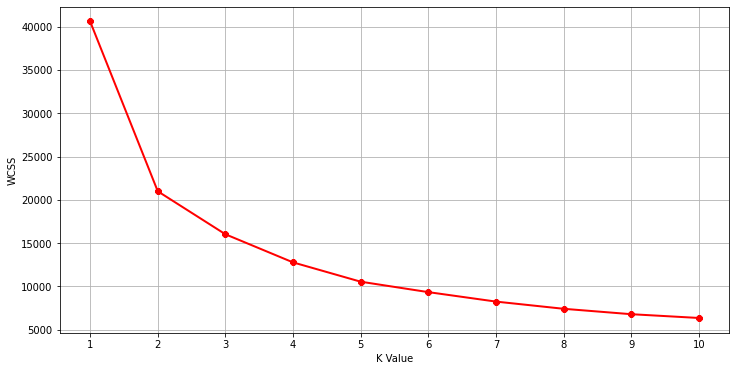

In [ ]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=100)
    kmeans.fit(RFM_DF2)
    wcss.append(kmeans.inertia_)
    labels = kmeans.labels_
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

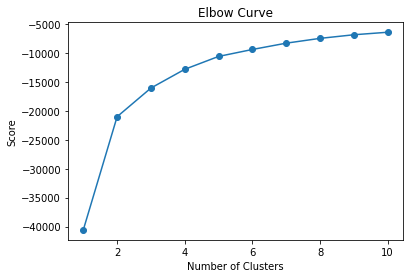

In [ ]:
kmeans = [KMeans(n_clusters=i, n_init=100) for i in range(1,11)]
score = [kmeans[i].fit(RFM_DF2).score(RFM_DF2) for i in range(len(kmeans))]
plt.plot(range(1,11),score, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
km = KMeans(n_clusters=4, n_init=100)
DF_cont_clust = RFM_DF2.copy()
clusters = km.fit_predict(DF_cont_clust)
DF_cont_clust["label"] = clusters

In [ ]:
import plotly.graph_objects as go

color_dict = {0: 'red', 1: 'blue', 2: 'green', 3: 'black' }

fig = go.Figure(data=[go.Scatter3d(
    x=DF_cont_clust['Recency'],
    y=DF_cont_clust['Frequency'],
    z=DF_cont_clust['Monetary'],
    mode='markers',
    marker=dict(
        size=8,
        color=[color_dict[c] for c in DF_cont_clust["label"]],
        opacity=0.8
    )
)])

# set axis titles and layout
fig.update_layout(scene=dict(xaxis_title='Recency', yaxis_title='Frequency', zaxis_title='Monetary'))

# show the plot
fig.show()

In [ ]:
def make_spider( df, row, title, color):
    from math import pi
    # number of variable
    categories=list(df)[:-1]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    #ax.set_rlabel_position(0)
    plt.ylim(df.to_numpy().min(),df.to_numpy().max())

    # Ind1
    values=df.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

In [ ]:
centroids = km.cluster_centers_

In [ ]:
dfRadar=pd.DataFrame(data=centroids,  columns=DF_cont_clust.columns[:-1])
dfRadar['cluster']=range(0,dfRadar.shape[0])

dfRadar

,Recency,Frequency,Monetary,cluster
0,5.22,4.42,7.28,0
1,5.82,2.50,5.43,1
2,2.21,5.65,8.54,2
3,3.03,3.65,6.43,3


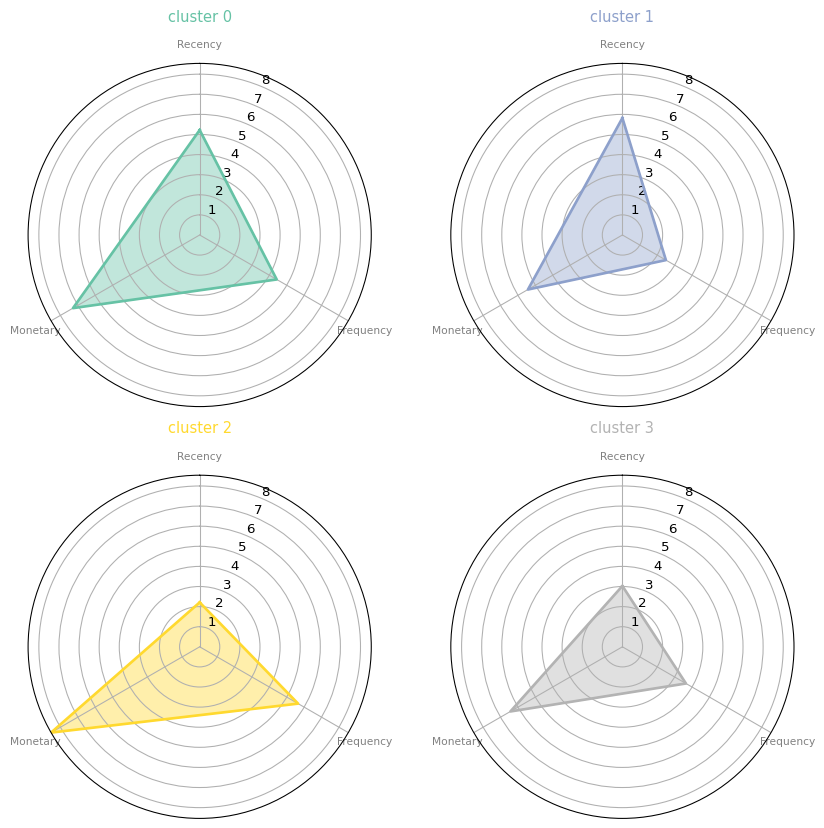

In [ ]:
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(dfRadar.index))

# Loop to plot
for row in range(len(dfRadar.index)):
    make_spider( dfRadar, row=row, title='cluster '+str(dfRadar['cluster'][row]), color=my_palette(row))

###Experimento RFM

In [ ]:
RFM_DF_cont["cluster"] = DF_cont_clust["label"]

In [ ]:
cluster1 = RFM_DF_cont[DF_cont_clust["label"] == 0 ]
cluster2 = RFM_DF_cont[DF_cont_clust["label"] == 1 ]
cluster3 = RFM_DF_cont[DF_cont_clust["label"] == 2 ]
cluster4 = RFM_DF_cont[DF_cont_clust["label"] == 3 ]

In [ ]:
print("AVERAGE MONETARY PER CLIENT: \n")
print("Cluster 1 = ", cluster1["Monetary"].mean())
print("Cluster 2 = ", cluster2["Monetary"].mean())
print("Cluster 3 = ", cluster3["Monetary"].mean())
print("Cluster 4 = ", cluster4["Monetary"].mean())

print("\nAVERAGE RECENCY PER CLIENT:\n")
print("Cluster 1 = ",cluster1["Recency"].mean())
print("Cluster 2 = ",cluster2["Recency"].mean())
print("Cluster 3 = ",cluster3["Recency"].mean())
print("Cluster 4 = ",cluster4["Recency"].mean())

print("\nAVERAGE FREQUENCY PER CLIENT:\n")
print("Cluster 1 = ",cluster1["Frequency"].mean())
print("Cluster 2 = ", cluster2["Frequency"].mean())
print("Cluster 3 = ", cluster3["Frequency"].mean())
print("Cluster 4 = ", cluster4["Frequency"].mean())

totalclients = RFM_DF_cont.shape[0]
print("\nNUMBER OF CLIENTS:\n")
print("Cluster 1 = ", round(cluster1.shape[0] / totalclients * 100),"%")
print("Cluster 2 = ", round(cluster2.shape[0] / totalclients * 100),"%")
print("Cluster 3 = ", round(cluster3.shape[0] / totalclients * 100),"%")
print("Cluster 4 = ", round(cluster4.shape[0] / totalclients * 100),"%")

totalsales= RFM_DF_cont["Monetary"].sum()
print("\n%SALES:\n")
print("Cluster 1 = ", round(cluster1["Monetary"].sum() / totalsales * 100),"%")
print("Cluster 2 = ", round(cluster2["Monetary"].sum() / totalsales * 100),"%")
print("Cluster 3 = ", round(cluster3["Monetary"].sum() / totalsales * 100),"%")
print("Cluster 4 = ", round(cluster4["Monetary"].sum() / totalsales * 100),"%")


print("--------------COMPARED TO RFM VALUES---------")


print("AVERAGE MONETARY PER CLIENT: \n")
print("Low Priority = ",Low_priorities["Monetary"].mean())
print("Quality client = ",Quality_clients["Monetary"].mean())
print("Top client = ", top_clients["Monetary"].mean())
print("Loosing client = ", loosing_clients["Monetary"].mean())

print("\nAVERAGE RECENCY PER CLIENT:\n")
print("Low Priority = ",Low_priorities["Recency"].mean())
print("Quality client = ",Quality_clients["Recency"].mean())
print("Top client = ", top_clients["Recency"].mean())
print("Loosing client = ", loosing_clients["Recency"].mean())

print("\nAVERAGE FREQUENCY PER CLIENT:\n")
print("Low Priority = ",Low_priorities["Frequency"].mean())
print("Quality client = ",Quality_clients["Frequency"].mean())
print("Top client = ", top_clients["Frequency"].mean())
print("Loosing client = ", loosing_clients["Frequency"].mean())
totalclients = RFM_DF.shape[0]
print("\nNUMBER OF CLIENTS:\n")
print("Low Priority = ", round(Low_priorities.shape[0] / totalclients * 100),"%")
print("Quality client = ",round(Quality_clients.shape[0] / totalclients * 100),"%")
print("Top client = ", round(top_clients.shape[0] / totalclients * 100),"%")
print("Loosing client = ", round(loosing_clients.shape[0] / totalclients * 100),"%")
totalsales= RFM_DF["Monetary"].sum()
print("\n%SALES:\n")
print("Low Priority = ", round(Low_priorities["Monetary"].sum() / totalsales * 100),"%")
print("Quality client = ",round(Quality_clients["Monetary"].sum() / totalsales * 100),"%")
print("Top client = ", round(top_clients["Monetary"].sum() / totalsales * 100),"%")
print("Loosing client = ", round(loosing_clients["Monetary"].sum() / totalsales * 100),"%")


AVERAGE MONETARY PER CLIENT: 

Cluster 1 =  2001.5951393005334
Cluster 2 =  296.1735443753533
Cluster 3 =  9898.55462184874
Cluster 4 =  799.7876254180602

AVERAGE RECENCY PER CLIENT:

Cluster 1 =  239.8636633076467
Cluster 2 =  398.6902204635387
Cluster 3 =  17.85546218487395
Cluster 4 =  29.232441471571907

AVERAGE FREQUENCY PER CLIENT:

Cluster 1 =  109.01066982809722
Cluster 2 =  17.281514980214812
Cluster 3 =  416.8487394957983
Cluster 4 =  52.763377926421406

NUMBER OF CLIENTS:

Cluster 1 =  29 %
Cluster 2 =  30 %
Cluster 3 =  20 %
Cluster 4 =  20 %

%SALES:

Cluster 1 =  20 %
Cluster 2 =  3 %
Cluster 3 =  71 %
Cluster 4 =  6 %
--------------COMPARED TO RFM VALUES---------
AVERAGE MONETARY PER CLIENT: 

Low Priority =  483.9906142653353
Quality client =  1908.3380649819494
Top client =  11337.082434574977
Loosing client =  3239.9804422657953

AVERAGE RECENCY PER CLIENT:

Low Priority =  268.64279600570615
Quality client =  50.01083032490975
Top client =  32.190066857688635
Loosin

#A priori

In [ ]:
df_Apriori = cleanWithPercentages[['Invoice','Description','Quantity']].copy()
df_Apriori

,Invoice,Description,Quantity
0,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12
1,489434,PINK CHERRY LIGHTS,12
2,489434,WHITE CHERRY LIGHTS,12
3,489434,"RECORD FRAME 7"" SINGLE SIZE",48
4,489434,STRAWBERRY CERAMIC TRINKET BOX,24
...,...,...,...
1000493,581587,PACK OF 20 SPACEBOY NAPKINS,12
1000494,581587,CHILDREN'S APRON DOLLY GIRL,6
1000495,581587,CHILDRENS CUTLERY DOLLY GIRL,4
1000496,581587,CHILDRENS CUTLERY CIRCUS PARADE,4


In [ ]:
def return_one(x):
    return 1

table = pd.pivot_table(df_Apriori, values='Quantity', index=['Invoice'],
                    columns=['Description'], aggfunc=return_one, fill_value=0)
table

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
581586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
frequent_itemsets = apriori(table, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.01,( SET 2 TEA TOWELS I LOVE LONDON )
1,0.01,(10 COLOUR SPACEBOY PEN)
2,0.01,(12 MESSAGE CARDS WITH ENVELOPES)
3,0.02,(12 PENCIL SMALL TUBE WOODLAND)
4,0.01,(12 PENCILS SMALL TUBE RED RETROSPOT)
...,...,...
1110,0.01,"(LUNCH BAG SPACEBOY DESIGN , LUNCH BAG CARS BL..."
1111,0.01,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC..."
1112,0.01,"(POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO..."
1113,0.01,"(WHITE HANGING HEART T-LIGHT HOLDER, WOODEN FR..."


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PAPER CHAIN KIT 50'S CHRISTMAS ),(60 CAKE CASES VINTAGE CHRISTMAS),0.05,0.03,0.01,0.20,7.61,0.01,1.22
1,(60 CAKE CASES VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS ),0.03,0.05,0.01,0.39,7.61,0.01,1.57
2,(60 CAKE CASES VINTAGE CHRISTMAS),(PAPER CHAIN KIT VINTAGE CHRISTMAS),0.03,0.04,0.01,0.42,11.43,0.01,1.66
3,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(60 CAKE CASES VINTAGE CHRISTMAS),0.04,0.03,0.01,0.31,11.43,0.01,1.40
4,(60 CAKE CASES VINTAGE CHRISTMAS),(SET OF 20 VINTAGE CHRISTMAS NAPKINS),0.03,0.03,0.01,0.46,16.50,0.01,1.80
...,...,...,...,...,...,...,...,...,...
789,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...","(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.02,0.02,0.01,0.60,28.82,0.01,2.42
790,(ROSES REGENCY TEACUP AND SAUCER ),"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",0.04,0.01,0.01,0.30,23.95,0.01,1.41
791,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , REGENCY CAK...",0.03,0.01,0.01,0.42,28.39,0.01,1.69
792,(REGENCY CAKESTAND 3 TIER),"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.10,0.02,0.01,0.11,5.83,0.01,1.10


In [ ]:
rules.sort_values(['lift'], ascending= False).head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
771,(POPPY'S PLAYHOUSE LIVINGROOM ),"(POPPY'S PLAYHOUSE BEDROOM , POPPY'S PLAYHOUSE...",0.01,0.01,0.01,0.73,50.72,0.01,3.59
770,"(POPPY'S PLAYHOUSE BEDROOM , POPPY'S PLAYHOUSE...",(POPPY'S PLAYHOUSE LIVINGROOM ),0.01,0.01,0.01,0.73,50.72,0.01,3.70
769,"(POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...",(POPPY'S PLAYHOUSE BEDROOM ),0.01,0.02,0.01,0.86,47.80,0.01,7.13
772,(POPPY'S PLAYHOUSE BEDROOM ),"(POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...",0.02,0.01,0.01,0.58,47.80,0.01,2.36
768,"(POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...",(POPPY'S PLAYHOUSE KITCHEN),0.01,0.02,0.01,0.89,46.72,0.01,8.81
773,(POPPY'S PLAYHOUSE KITCHEN),"(POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...",0.02,0.01,0.01,0.55,46.72,0.01,2.20
109,(COFFEE MUG DOG + BALL DESIGN),(COFFEE MUG CAT + BIRD DESIGN),0.01,0.02,0.01,0.75,45.49,0.01,3.96
108,(COFFEE MUG CAT + BIRD DESIGN),(COFFEE MUG DOG + BALL DESIGN),0.02,0.01,0.01,0.61,45.49,0.01,2.55
538,(POPPY'S PLAYHOUSE LIVINGROOM ),(POPPY'S PLAYHOUSE BEDROOM ),0.01,0.02,0.01,0.82,45.25,0.01,5.35
539,(POPPY'S PLAYHOUSE BEDROOM ),(POPPY'S PLAYHOUSE LIVINGROOM ),0.02,0.01,0.01,0.65,45.25,0.01,2.85


###Recommendation Engine

In [ ]:
cleanerDF = pd.read_pickle("/content/PickletoUse.pkl")

In [ ]:
RFM_DF = RFM_DF.reset_index()
RFM_DF
RecommendationsDF = cleanWithPercentages.merge(RFM_DF[['Customer ID', 'Monetary_score']], on='Customer ID', how='left')
DataframeRecommend = RFM_DF.copy()
RecommendationsDF = RecommendationsDF[RecommendationsDF["Monetary_score"] == 5 ]
RecommendationsDF = RecommendationsDF.filter(["Customer ID", "Description", "Sales"])
RecommendationsDF

,Customer ID,Description,Sales
12,13078.0,DOOR MAT BLACK FLOCK,59.50
13,13078.0,LOVE BUILDING BLOCK WORD,98.10
14,13078.0,HOME BUILDING BLOCK WORD,17.85
15,13078.0,ASSORTED COLOUR BIRD ORNAMENT,27.04
16,13078.0,PEACE WOODEN BLOCK LETTERS,20.85
...,...,...,...
1000478,15804.0,FAIRY TALE COTTAGE NIGHT LIGHT,23.40
1000479,13113.0,LARGE CAKE STAND HANGING STRAWBERY,23.60
1000480,13113.0,SET OF 3 HANGING OWLS OLLIE BEAK,30.00
1000481,13113.0,RED RETROSPOT ROUND CAKE TINS,214.80


In [ ]:
pip install scikit-surprise


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3193684 sha256=136dd1746ed60b5d73b8f8dfe1eceeb0a2b367ba784531eac0679f17525f7d48
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [ ]:
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

In [ ]:
reader = Reader(rating_scale=(RecommendationsDF['Sales'].min(), RecommendationsDF['Sales'].max()))
data = Dataset.load_from_df(RecommendationsDF, reader)

In [ ]:


sim_options = {
    'name': 'cosine',
    'user_based': True
}

trainset = data.build_full_trainset()
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)



Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
# Get a list of items the user has not interacted with
user_id = "13113.0"
user_interacted_items = RecommendationsDF[RecommendationsDF['Customer ID'] == user_id]['Description'].unique()
all_items = RecommendationsDF['Description'].unique()
items_to_predict = set(all_items) - set(user_interacted_items)

# Generate predictions for each item
predictions = []
for item_id in all_items:
    pred = algo.predict(user_id, item_id)
    predictions.append((item_id, pred.est))

# Sort items by predicted interaction value (descending order)
ranked_items = sorted(predictions, key=lambda x: x[1], reverse=True)

# Show the top 10 recommended items
top_n_recommendations = 10
print(f"Top {top_n_recommendations} recommendations for user {user_id}:")
for i, (item_id, est) in enumerate(ranked_items[:top_n_recommendations]):
    print(f"{i + 1}. Item ID: {item_id}, Predicted Sales: {est:.2f}")



Top 10 recommendations for user 13113.0:
1. Item ID: MIRROR, ARCHED GEORGIAN, Predicted Sales: 3884.00
2. Item ID: SMALL FAIRY CAKE FRIDGE MAGNETS, Predicted Sales: 1951.95
3. Item ID: ENGLISH ROSE EDWARDIAN PARASOL, Predicted Sales: 1515.00
4. Item ID: MISELTOE HEART WREATH CREAM, Predicted Sales: 996.00
5. Item ID: ROSES ON BLUE TEACUP CANDLE , Predicted Sales: 601.08
6. Item ID: GOLD WINE GLASS, Predicted Sales: 499.41
7. Item ID: SET OF 3 WICKER BASKET ROSE, Predicted Sales: 462.00
8. Item ID: RED WALL CLOCK, Predicted Sales: 459.00
9. Item ID: IVORY WALL CLOCK, Predicted Sales: 459.00
10. Item ID: LITTLE FLOWER SHOPPER BAG, Predicted Sales: 424.00


In [ ]:
trials = RecommendationsDF[RecommendationsDF["Customer ID"] == "13113.0" ]
trials = trials.groupby("Description").agg({"Customer ID":"first", "Sales":"sum"}).reset_index()
trials.sort_values("Sales", ascending=False).head(20)

,Description,Customer ID,Sales
105,PICNIC BASKET WICKER LARGE,13113.0,4284.00
129,REGENCY CAKESTAND 3 TIER,13113.0,2153.40
103,PARTY BUNTING,13113.0,1587.35
124,RED RETROSPOT ROUND CAKE TINS,13113.0,1181.40
151,SET/3 RED GINGHAM ROSE STORAGE BOX,13113.0,673.38
101,PAPER BUNTING WHITE LACE,13113.0,635.60
89,NATURAL SLATE HEART CHALKBOARD,13113.0,499.95
157,SPOTTY BUNTING,13113.0,434.80
42,DOORMAT HEARTS,13113.0,401.00
44,DOORMAT SPOTTY HOME SWEET HOME,13113.0,336.80


In [ ]:
# Get a list of items the user has not interacted with
user_id = "13113.0"
user_interacted_items = RecommendationsDF[RecommendationsDF['Customer ID'] == user_id]['Description'].unique()
all_items = RecommendationsDF['Description'].unique()
items_to_predict = set(all_items) - set(user_interacted_items)

# Generate predictions for each item
predictions = []
for item_id in items_to_predict:
    pred = algo.predict(user_id, item_id)
    predictions.append((item_id, pred.est))

# Sort items by predicted interaction value (descending order)
ranked_items = sorted(predictions, key=lambda x: x[1], reverse=True)

# Show the top 10 recommended items
top_n_recommendations = 10
print(f"Top {top_n_recommendations} recommendations for user {user_id}:")
for i, (item_id, est) in enumerate(ranked_items[:top_n_recommendations]):
    print(f"{i + 1}. Item ID: {item_id}, Predicted Sales: {est:.2f}")



Top 10 recommendations for user 13113.0:
1. Item ID: MIRROR, ARCHED GEORGIAN, Predicted Sales: 3884.00
2. Item ID: SMALL FAIRY CAKE FRIDGE MAGNETS, Predicted Sales: 1951.95
3. Item ID: ENGLISH ROSE EDWARDIAN PARASOL, Predicted Sales: 1515.00
4. Item ID: MISELTOE HEART WREATH CREAM, Predicted Sales: 996.00
5. Item ID: ROSES ON BLUE TEACUP CANDLE , Predicted Sales: 601.08
6. Item ID: GOLD WINE GLASS, Predicted Sales: 499.41
7. Item ID: SET OF 3 WICKER BASKET ROSE, Predicted Sales: 462.00
8. Item ID: RED WALL CLOCK, Predicted Sales: 459.00
9. Item ID: IVORY WALL CLOCK, Predicted Sales: 459.00
10. Item ID: LITTLE FLOWER SHOPPER BAG, Predicted Sales: 424.00


#SUMMARY:



###DATA CLEANING INSIGHTS:

- 70.000 rows were cleared.
- 3.000 which were not marked as cancelled o negative, but had not been taken off the dataset. They artificially inflated the dataset 5%. If the shop counted them as real they would have much false hopes.
- 6.4% of invoices, (570.000) products were not shipped because of human error.
- The shop can expect 75.000£ in bad debts for the year 2012.



###CANCELLATIONS:

- 17% invoices (733.000 products wer cancelled.
- Found harmful customers with hgih % of cancellations to look at by marketing team.
- Developed a model that can predict future cancellations with 95% accuracy. It will hopefully help the shop run more efficiently.
- Saw a small relationship between country distance and cancellations.
- Obtained a list of countries to investigate (USA 30% invoices cancelled...)



###UNDERSTANDING DATASET

- Managed to identify wholesale and retail customers. Helpful for prior analysis.
- Thanks to this, it was discovered that some wholesale customers are not registering to the shop, therefore the shope can't track and increase loyalty and hand offers.



###CUSTOMER SPENDING:

- Saw few customers accounted for most of the sales. Ex. Top 500/5800 accounted to almost half the sales and products bought.
- Saw that more products != more sales for top customers. Needs more investigation.




###PRODUCTS:

- Saw that stock could be managed much more efficiently. Ex. 1000/5000 products account for just 0.6% of sales. 2.500 products could be removed from stock without major impact. Should focus more on top selling products and their variations.



###RFM AND CLUSTERING:

- Identified and classified different customer segments.
- Top customers for RFM and Kmeans agreed, rest different possibilities.
- Will likely stick to RFM to hand classification to marketing team.



###A PRIORI:

- Used A priori to find relationships between products and specially saw how product variations were bought together greatly. Sign of wholesale cuswtomers. Good idea to hand offers or sell in packs.
- Need to investigate more to see how those nodes of product variations connect with others for pack cross-selling.



###RECOMMENDATION ENGINE:

- Used collaborative filtering for top customers to obtain a list of top ten products to recommend them.
- Together with A priori findings should give marketing team good insights for increasing top customers spend.

